In [58]:
from music21 import *
# Time Signatures and Beats
# beat, beatstr, beatCount
noteC = note.Note('C4', type='half')
noteD = note.Note('D4', type='quarter')
noteE = note.Note('E4', type='quarter')
noteF = note.Note('F4', type='half')

tsThreeFour = meter.TimeSignature('3/4')

print(tsThreeFour.numerator, '/',  tsThreeFour.denominator)
tsFast68 = meter.TimeSignature('fast 3/4')
tsSlow68 = meter.TimeSignature('slow 3/4')
print(tsSlow68.__class__) # !!!!!!!
tsFast68.beatCount, tsSlow68.beatCount

3 / 4
<class 'music21.meter.TimeSignature'>


(3, 3)

In [45]:
# Up until now almost all the music we’ve
#  been working with has been in 4/4. That’s not because we love common time so much, but simply because as we noted in Chapter 4 it’s because 4/4 is the default time signature for music21 Stream objects that don’t have another time signature applied to them.

# In general, TimeSignature objects are found within Measure objects (a Stream subclass). However, in some cases TimeSignature objects can exist directly on a Stream.

# TimeSignature objects, as a subclass of the Music21Object, have an offset and can be positioned anywhere on a Stream. When placed in a Measure, TimeSignature objects are often placed at the start, or zero offset position. The Measure property timeSignature can be used to set or get a TimeSignature at the zero offset position. If a Measure does not have a TimeSignature, the timeSignature property returns None.


3/4
0.0
{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.meter.TimeSignature 3/4>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note D>
{3.0} <music21.stream.Measure 2 offset=3.0>
    {0.0} <music21.note.Note E>
    {1.0} <music21.note.Note F>
    {3.0} <music21.bar.Barline type=final>


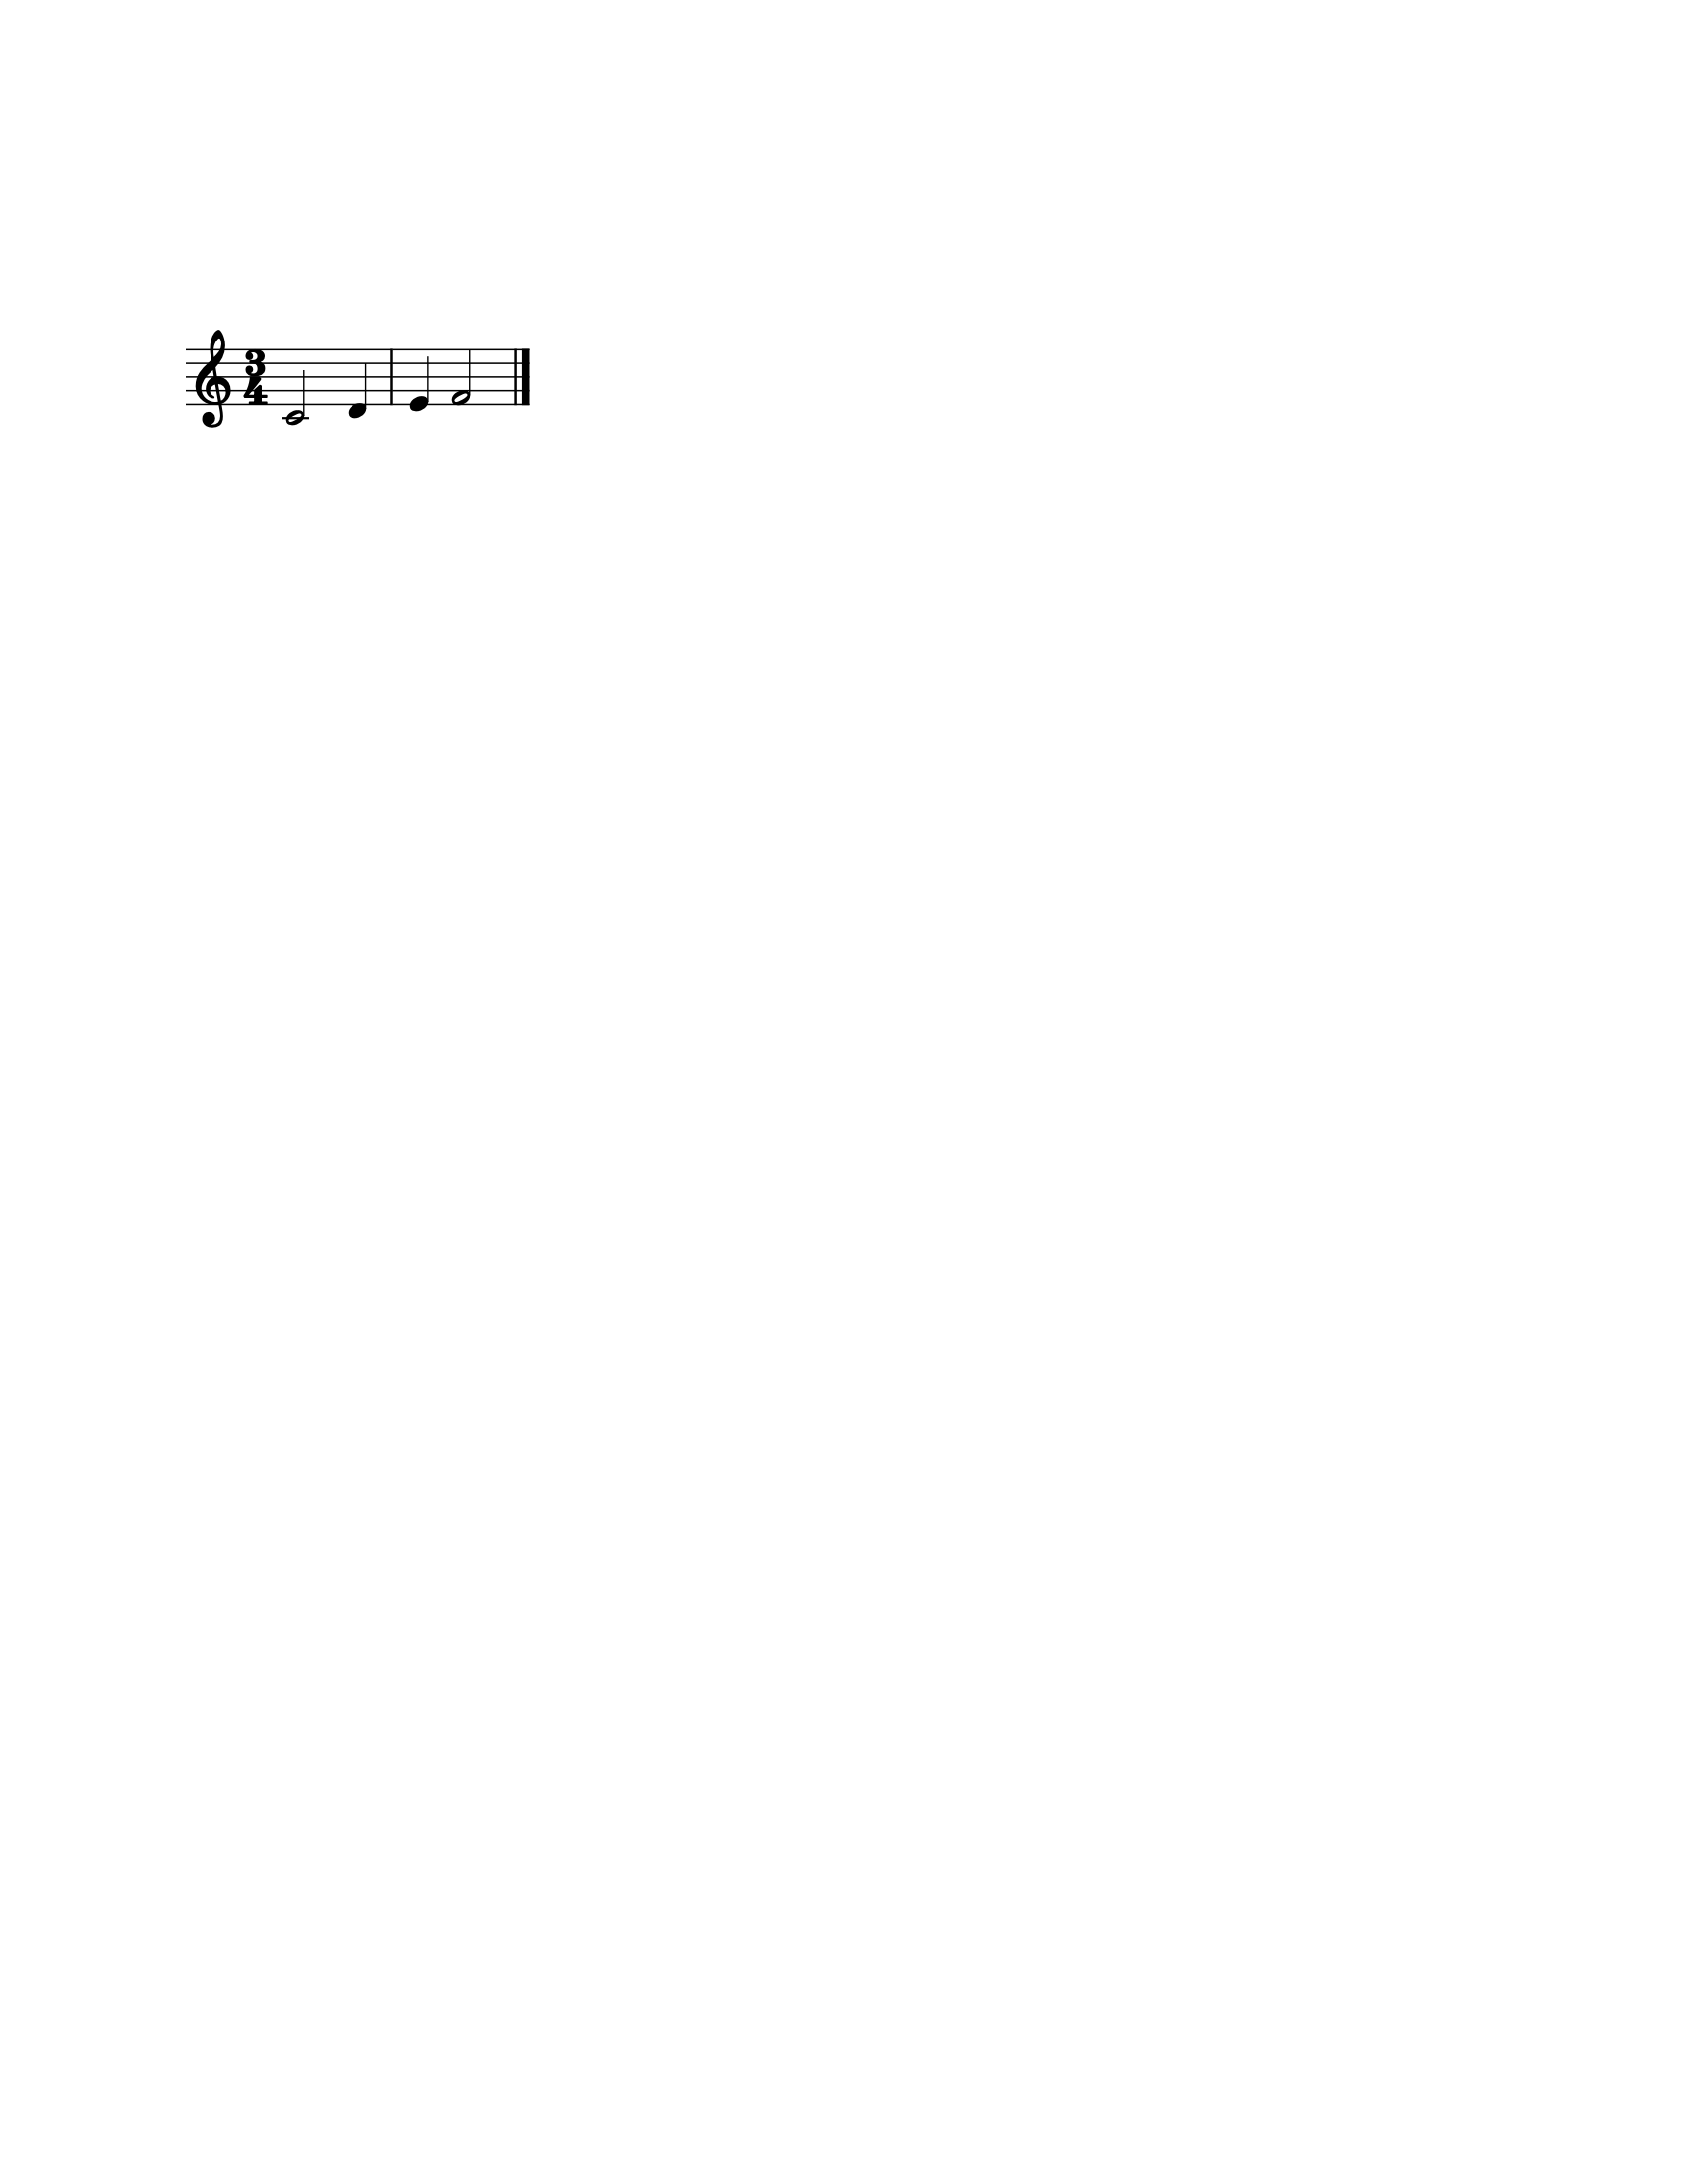

In [8]:
print(tsThreeFour.ratioString)
print(tsThreeFour.duration.quarterLength) # Time signatures have no length
stream1 = stream.Stream()

for thisThing in [tsThreeFour, noteC, noteD, noteE, noteF]:
    stream1.append(thisThing)
stream2 = stream1.makeMeasures()
stream2.show("text")
stream1.show()





<music21.note.Note C>
1.0
<music21.duration.Duration 2.0>
<music21.duration.Duration 1.0>
<music21.duration.Duration 1.0>
<music21.note.Note C> 1.0
<music21.note.Note D> 3.0
<music21.note.Note E> 1.0
<music21.note.Note F> 2.0
<music21.note.Note C>
<music21.note.Note E>


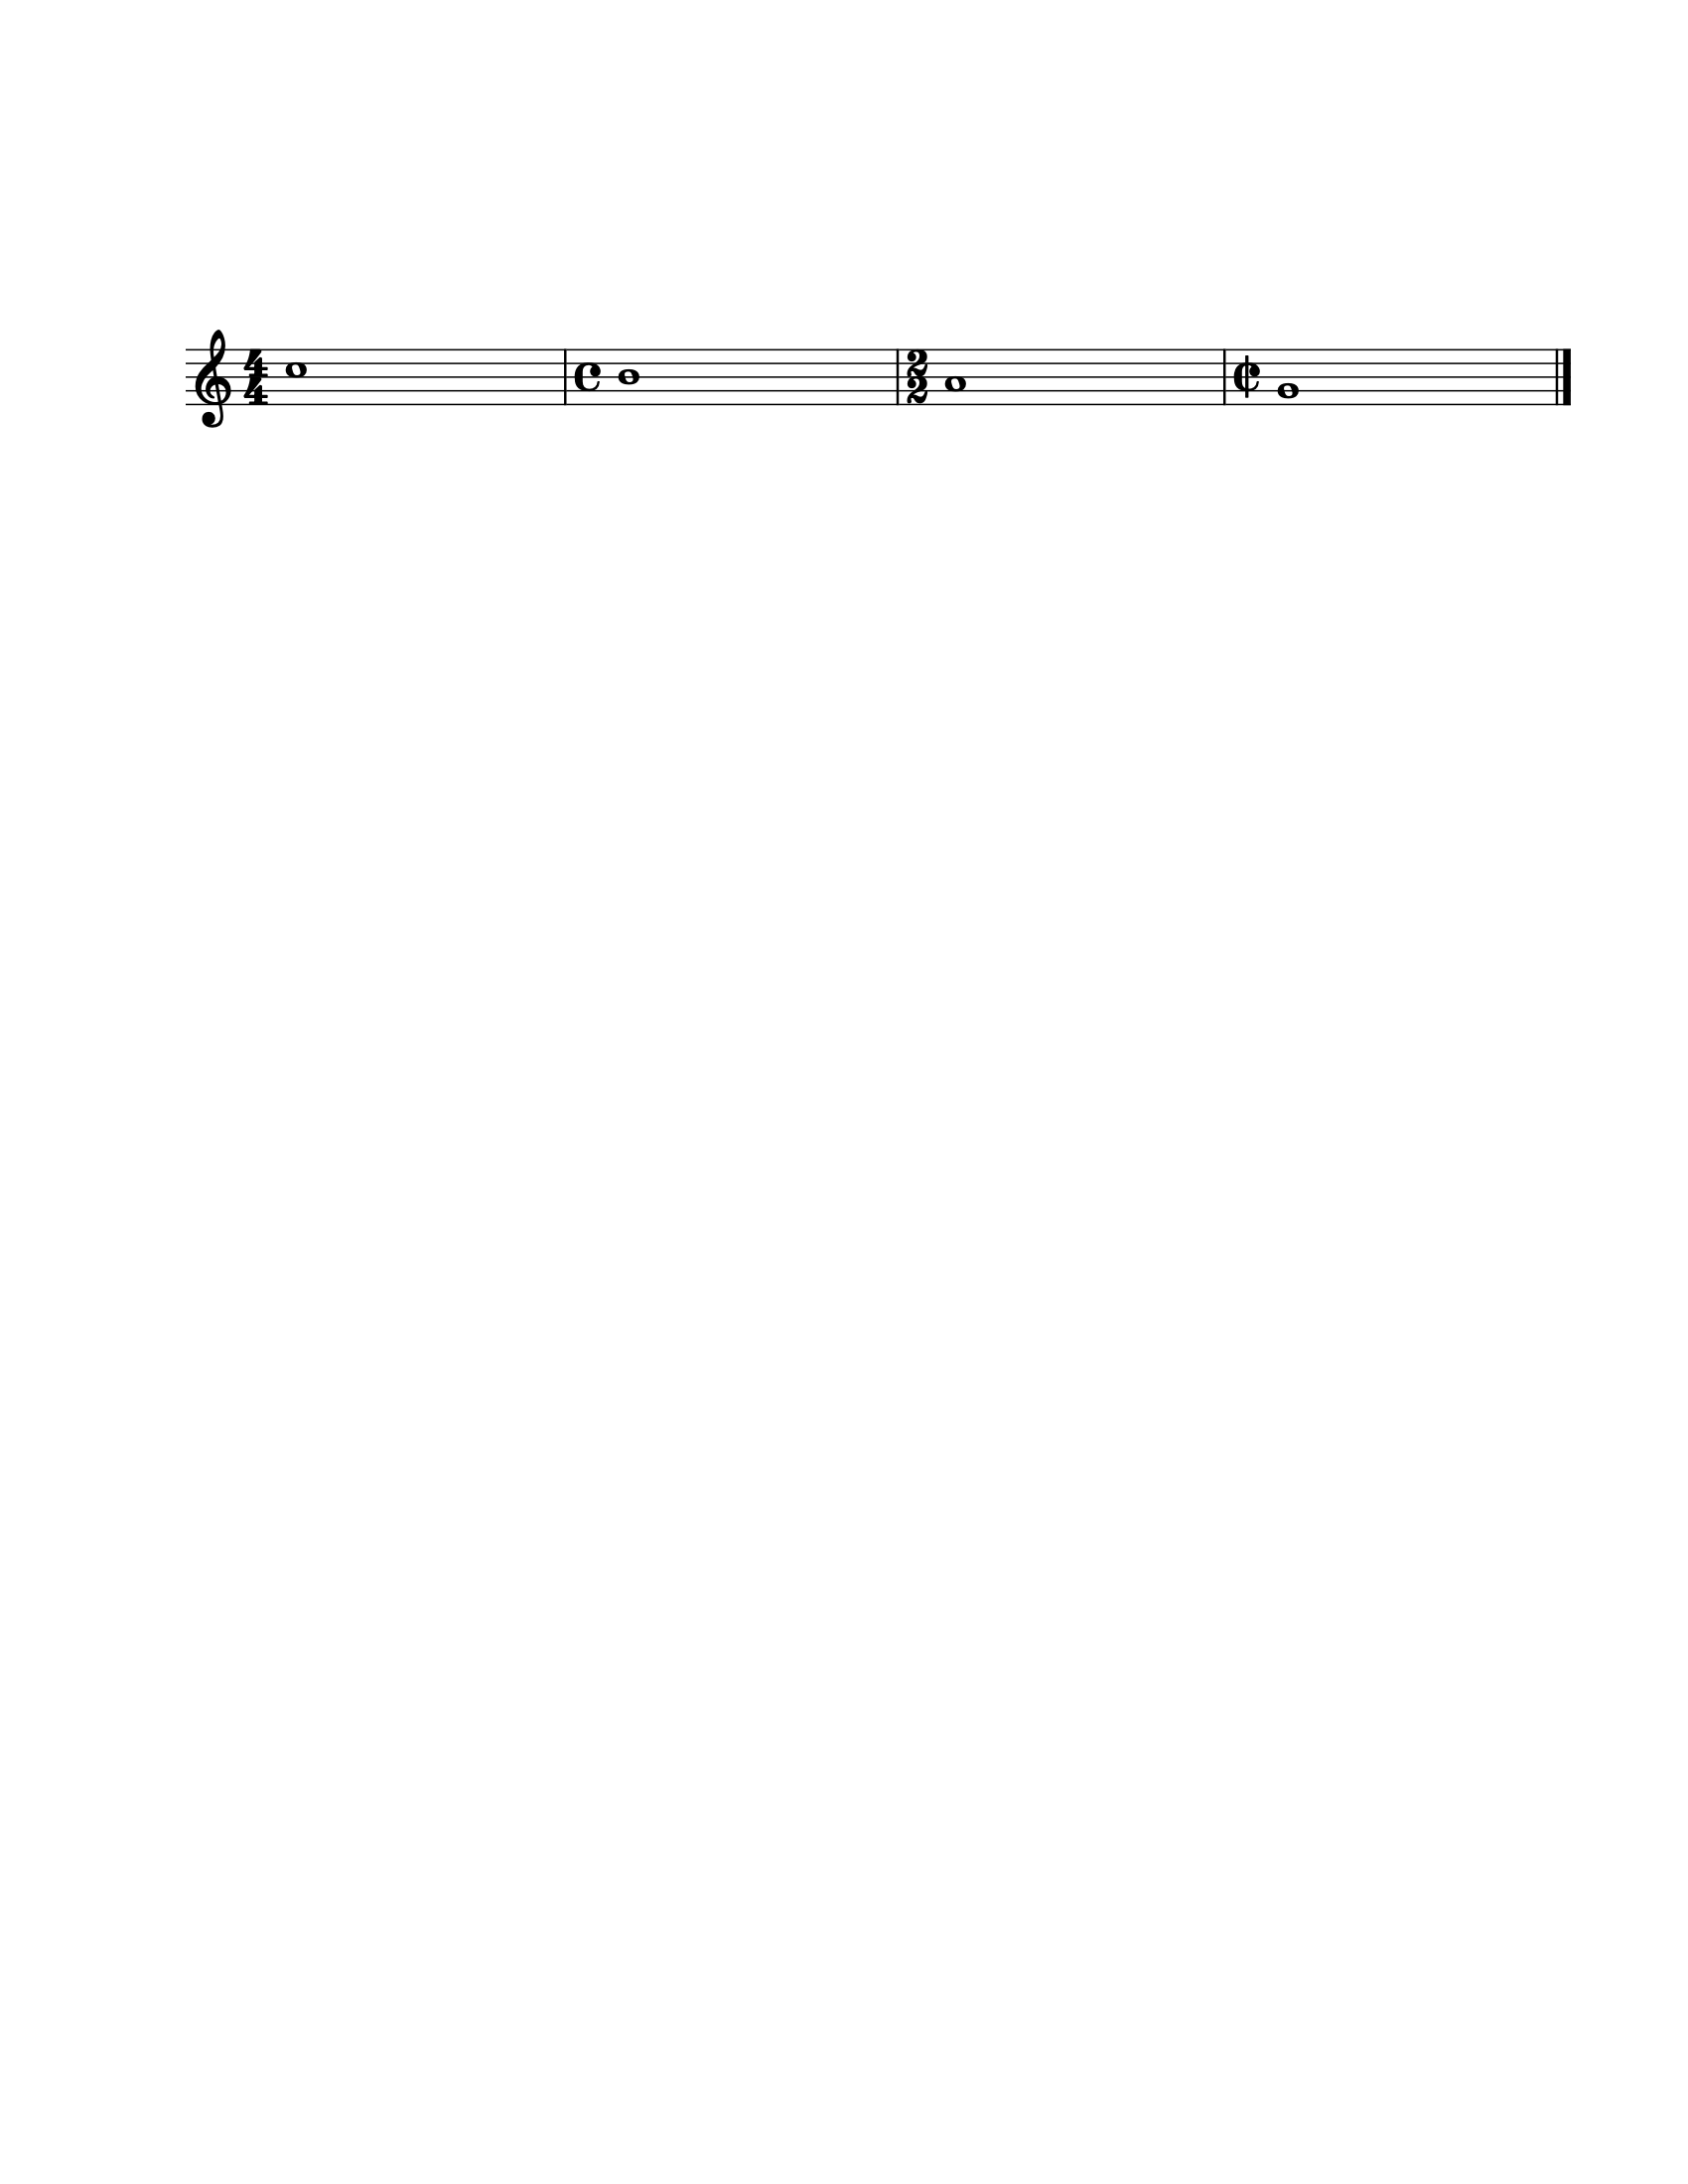

In [19]:
s = stream.Stream()
ts0 = meter.TimeSignature('4/4')
ts1 = meter.TimeSignature('4/4')
ts1.symbol = 'common'
ts2 = meter.TimeSignature('2/2')
ts3 = meter.TimeSignature('2/2')
ts3.symbol = 'cut'
s.append(ts0)
s.append(note.Note('C5', type='whole'))
s.append(ts1)
s.append(note.Note('B4', type='whole'))
s.append(ts2)
s.append(note.Note('A4', type='whole'))
s.append(ts3)
s.append(note.Note('G4', type='whole'))
s.makeMeasures(inPlace=True)
print(stream1.notes[0])
print(stream1.notes[0].beat)
print(stream1.notes[0].duration)
print(stream1.notes[1].duration)
print(stream1.notes[2].duration)
for n in stream1.notes:
    print(n, n.beat)
for n in stream1.notes:
    if n.beat == 1.0:
        print(n)
s.show()

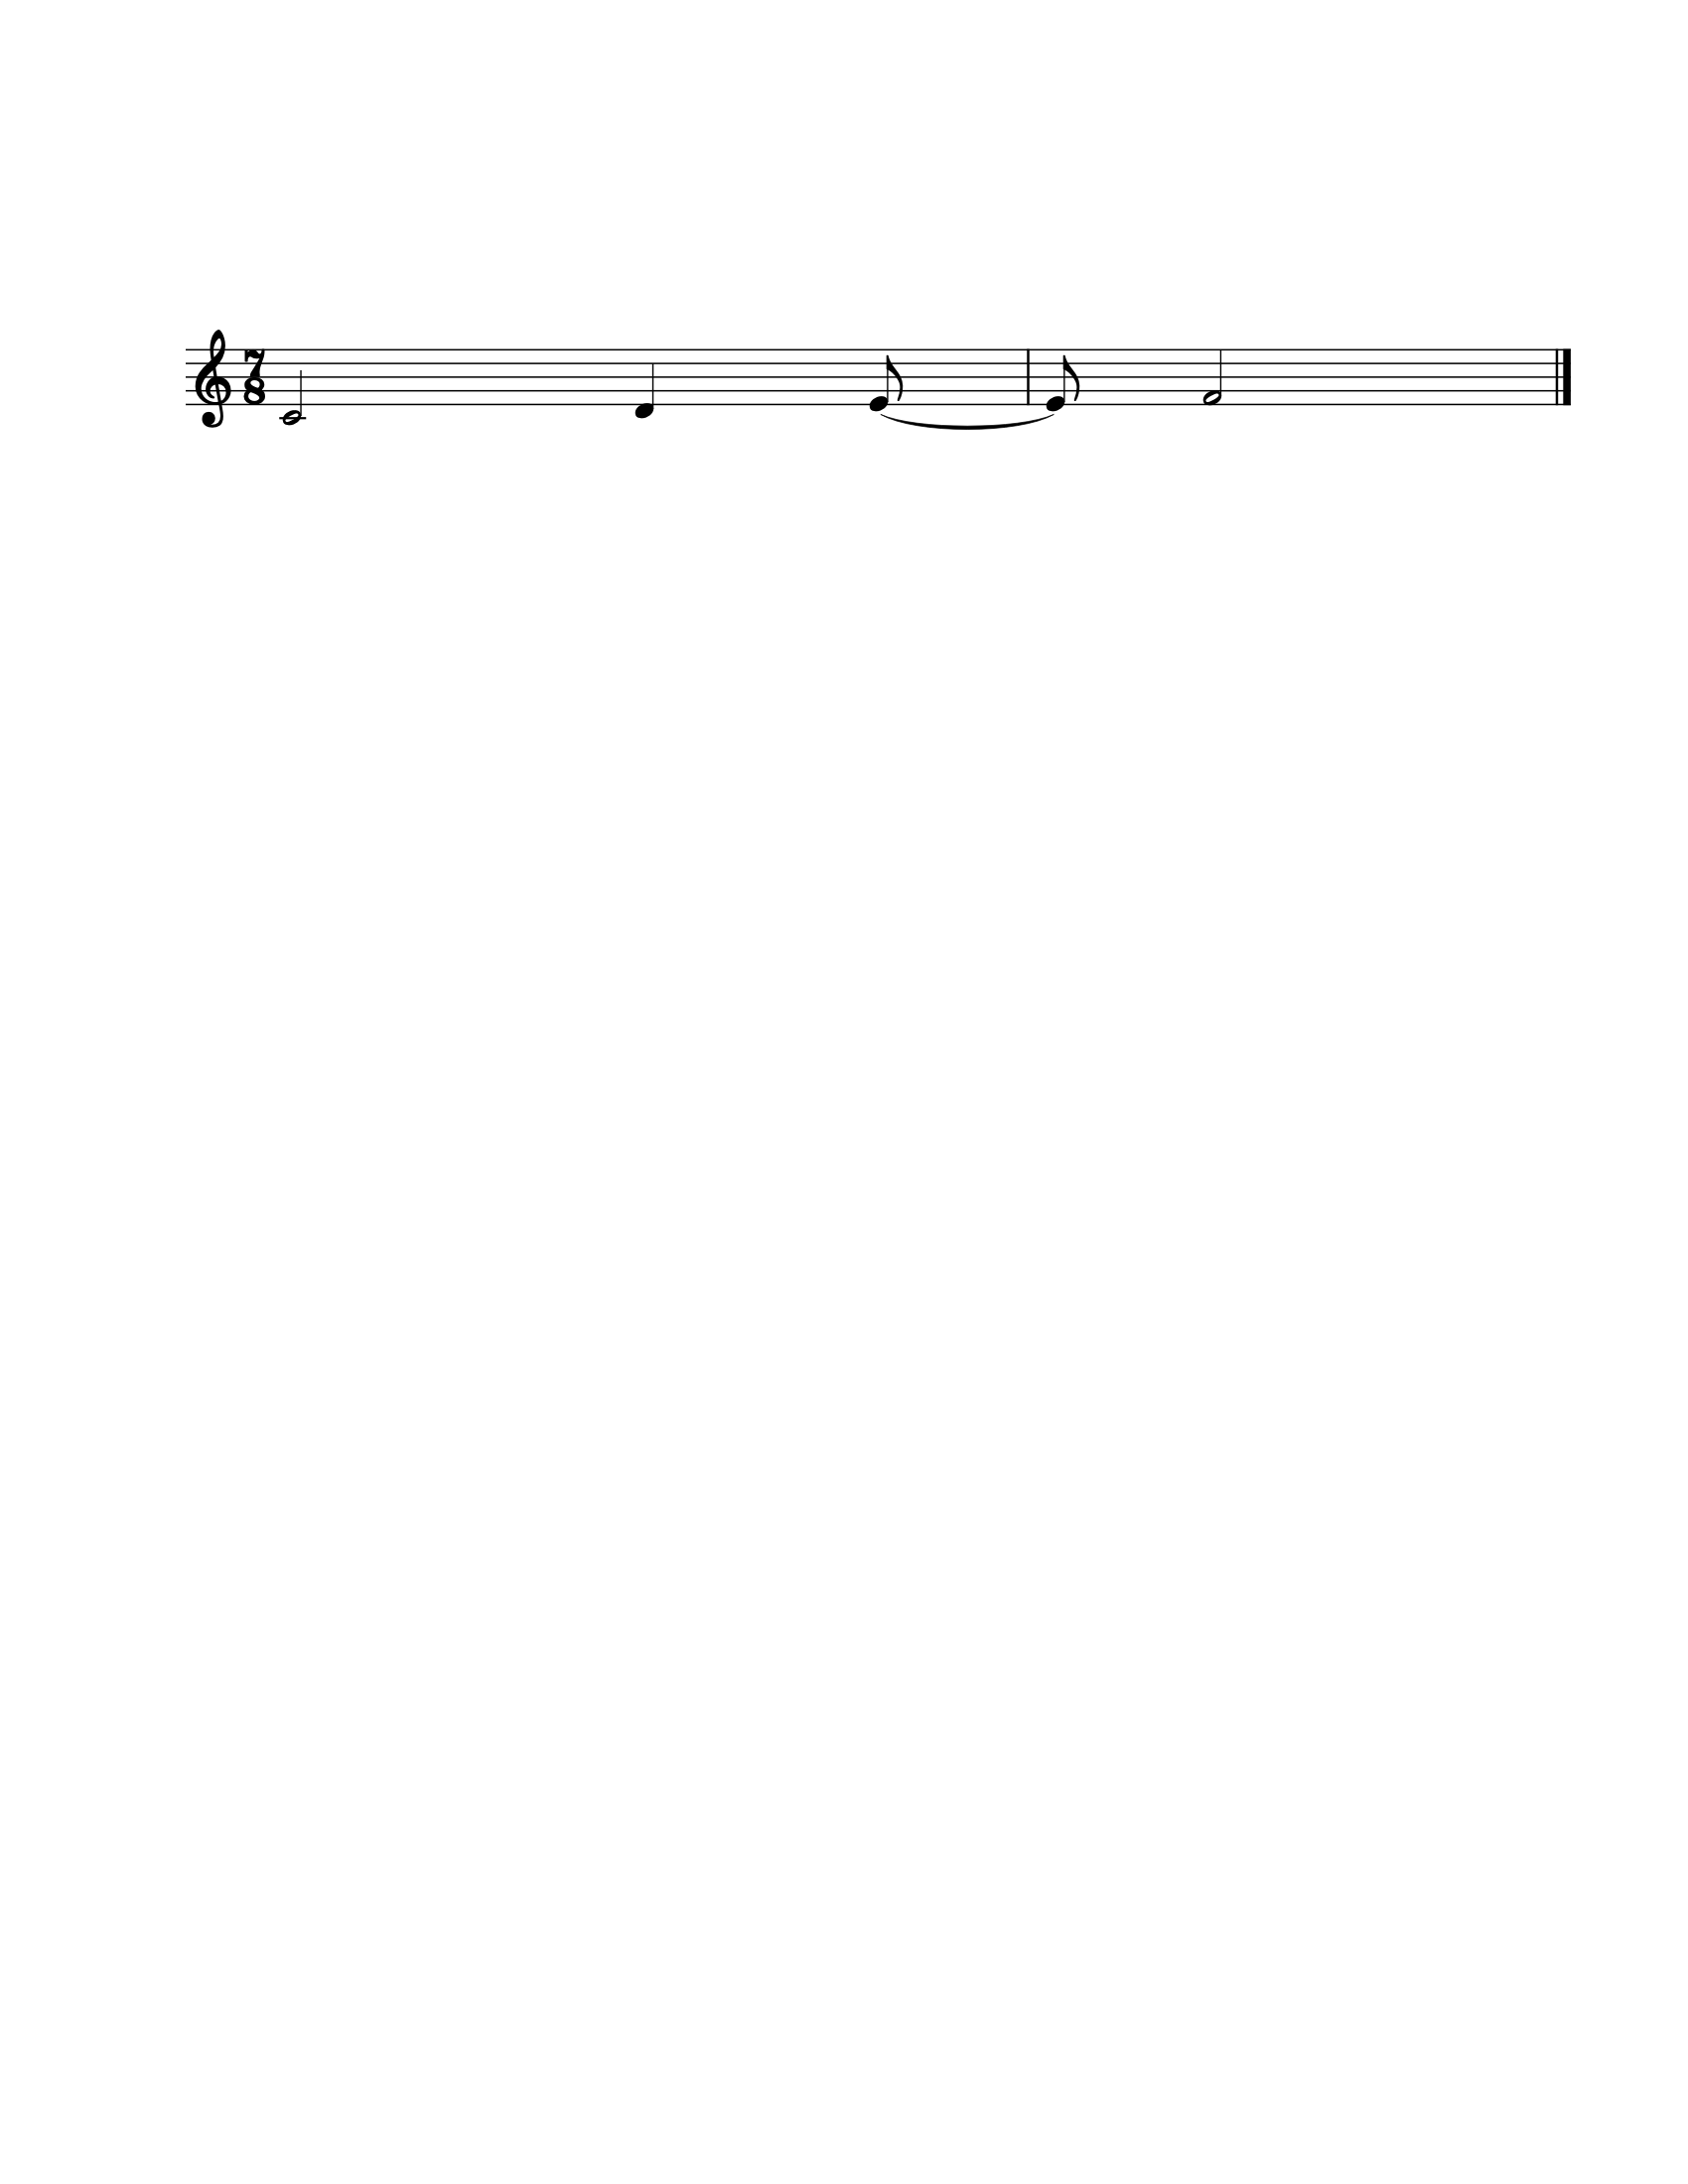

In [21]:
tsThreeFour.numerator = 7
tsThreeFour.denominator = 8
tsThreeFour
stream1.show()

In [48]:
for n in stream1.notes:
    print(n, n.beatStr)
    print(n, n.duration)
    print(n, n.pitch)
tsThreeFour.beatCount
n.classSet

<music21.note.Note C> 1
<music21.note.Note C> <music21.duration.Duration 2.0>
<music21.note.Note C> C4
<music21.note.Note D> 5
<music21.note.Note D> <music21.duration.Duration 1.0>
<music21.note.Note D> D4
<music21.note.Note E> 7
<music21.note.Note E> <music21.duration.Duration 1.0>
<music21.note.Note E> E4
<music21.note.Note F> 2
<music21.note.Note F> <music21.duration.Duration 2.0>
<music21.note.Note F> F4


frozenset({music21.base.Music21Object,
           music21.note.GeneralNote,
           music21.note.NotRest,
           music21.note.Note,
           object,
           'GeneralNote',
           'Music21Object',
           'NotRest',
           'Note',
           'builtins.object',
           'music21.base.Music21Object',
           'music21.note.GeneralNote',
           'music21.note.NotRest',
           'music21.note.Note',
           'object'})

<music21.meter.TimeSignature 3/4>
1
<music21.meter.TimeSignature 3/4>
True


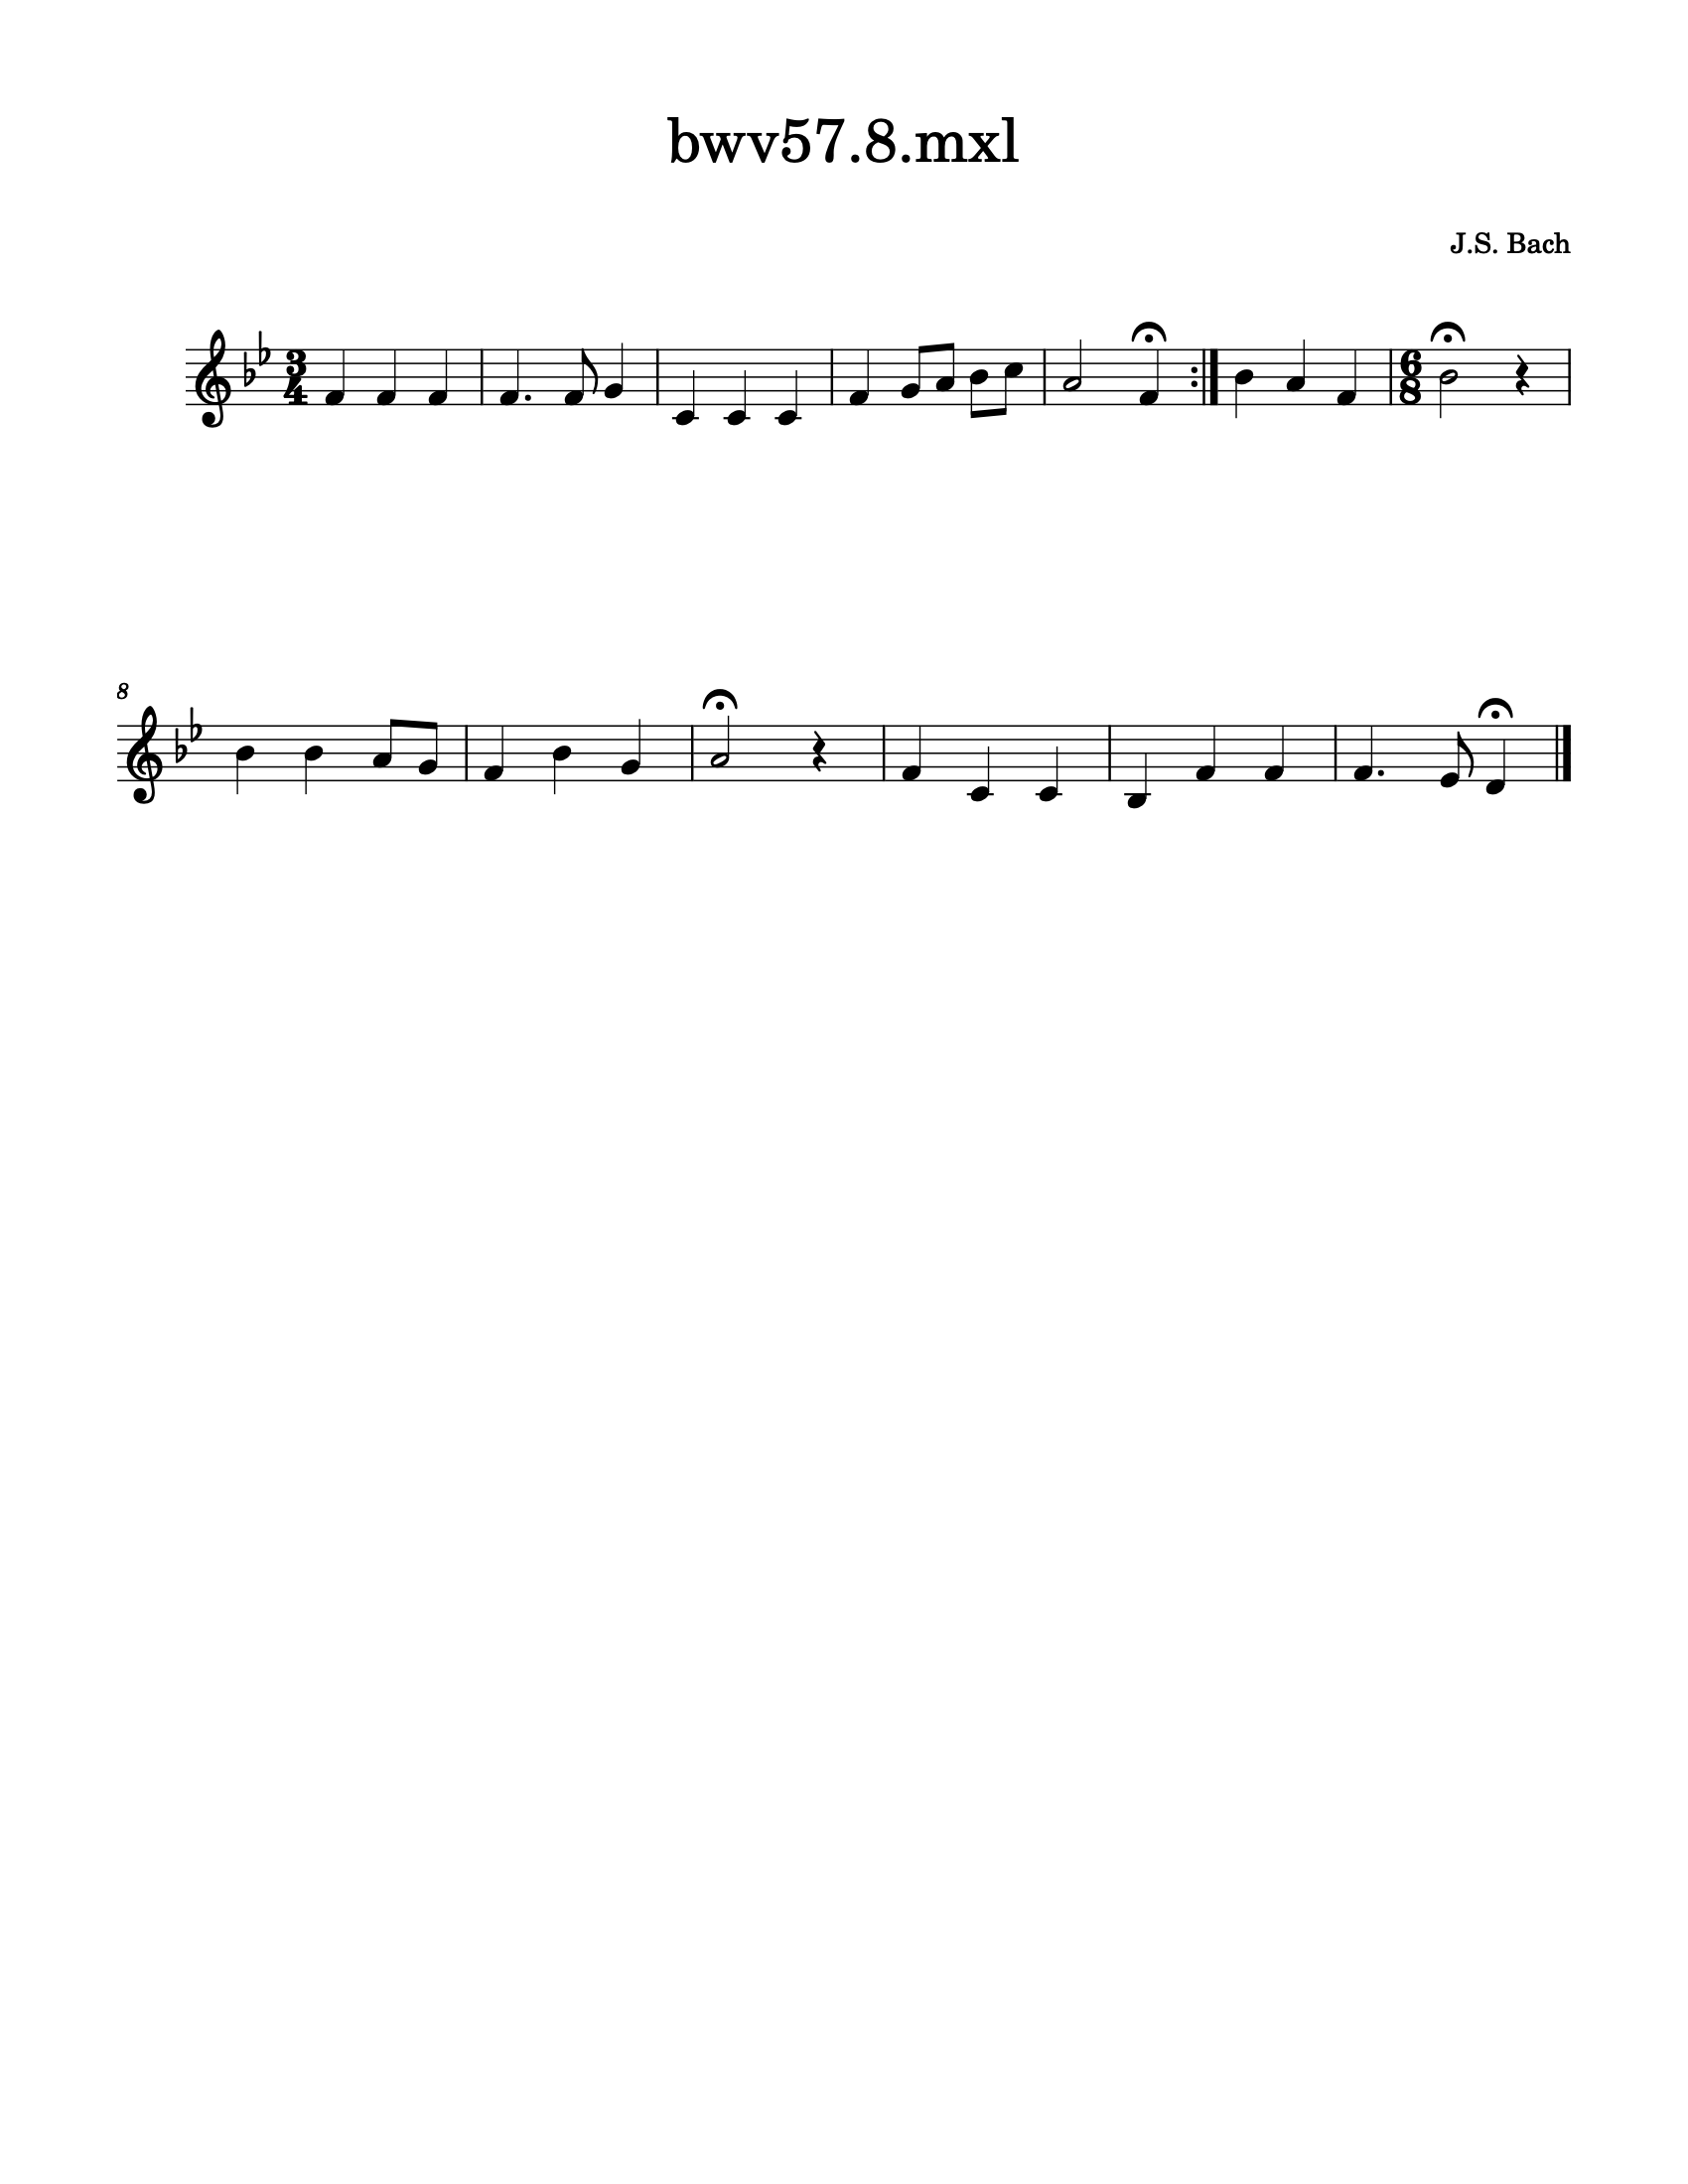

In [28]:
myBach = corpus.parse('bach/bwv57.8')
alto = myBach.parts['Alto']
print(alto.recurse().getElementsByClass(meter.TimeSignature)[0])
print(len(alto.recurse().getElementsByClass(meter.TimeSignature)))
print(alto.measure(1).timeSignature)
print(alto.measure(7).timeSignature is None)
alto.measure(7).timeSignature = meter.TimeSignature('6/8')
alto.makeBeams(inPlace=True)
for n in alto.recurse().notes:
    n.stemDirection = None

alto.show()
#To get all the elements in the Stream 
# we can use the flatten property, and
#  then search for a class with the
#  getElementsByClass() method



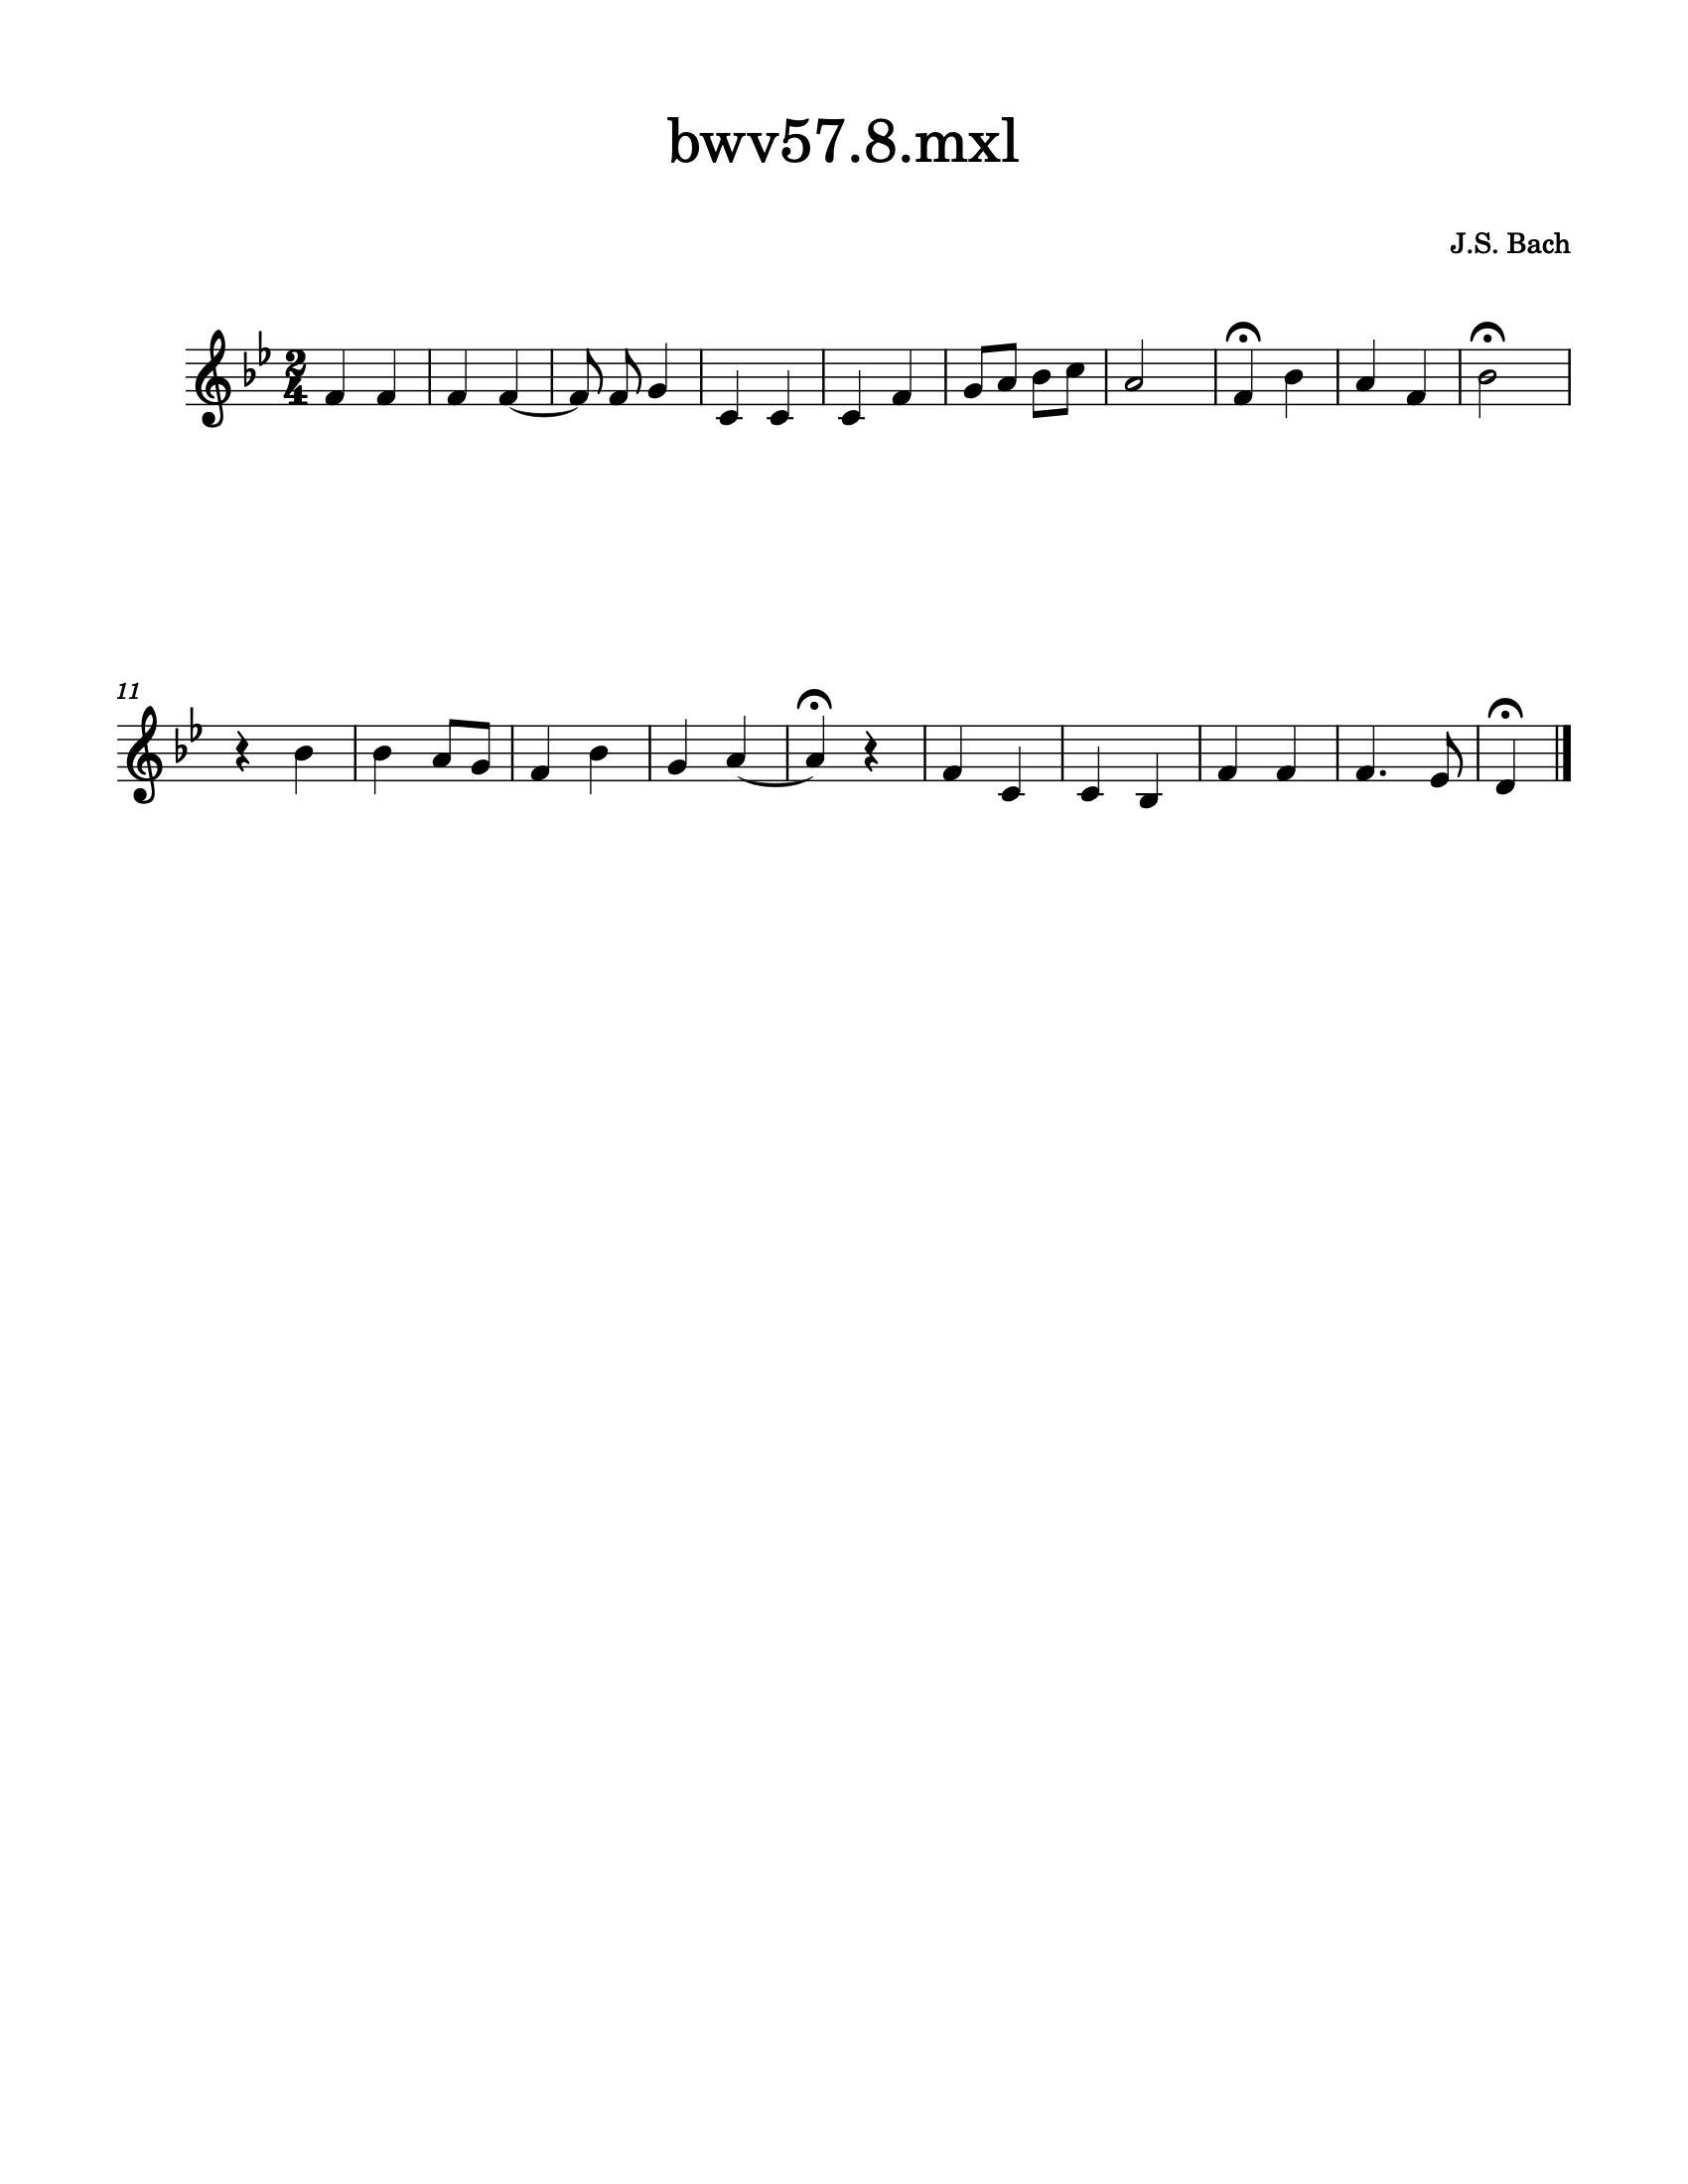

{0.0 - 2.0} <music21.stream.Measure 1 offset=0.0>
    {0.0 - 0.0} <music21.instrument.Instrument 'P2: Alto: '>
    {0.0 - 0.0} <music21.clef.TrebleClef>
    {0.0 - 0.0} <music21.key.Key of B- major>
    {0.0 - 0.0} <music21.meter.TimeSignature 2/4>
    {0.0 - 1.0} <music21.note.Note F>
    {1.0 - 2.0} <music21.note.Note F>
{2.0 - 4.5} <music21.stream.Measure 2 offset=2.0>
    {0.0 - 1.0} <music21.note.Note F>
    {1.0 - 2.5} <music21.note.Note F>
{4.0 - 6.0} <music21.stream.Measure 3 offset=4.0>
    {0.5 - 1.0} <music21.note.Note F>
    {1.0 - 2.0} <music21.note.Note G>
{6.0 - 8.0} <music21.stream.Measure 4 offset=6.0>
    {0.0 - 1.0} <music21.note.Note C>
    {1.0 - 2.0} <music21.note.Note C>


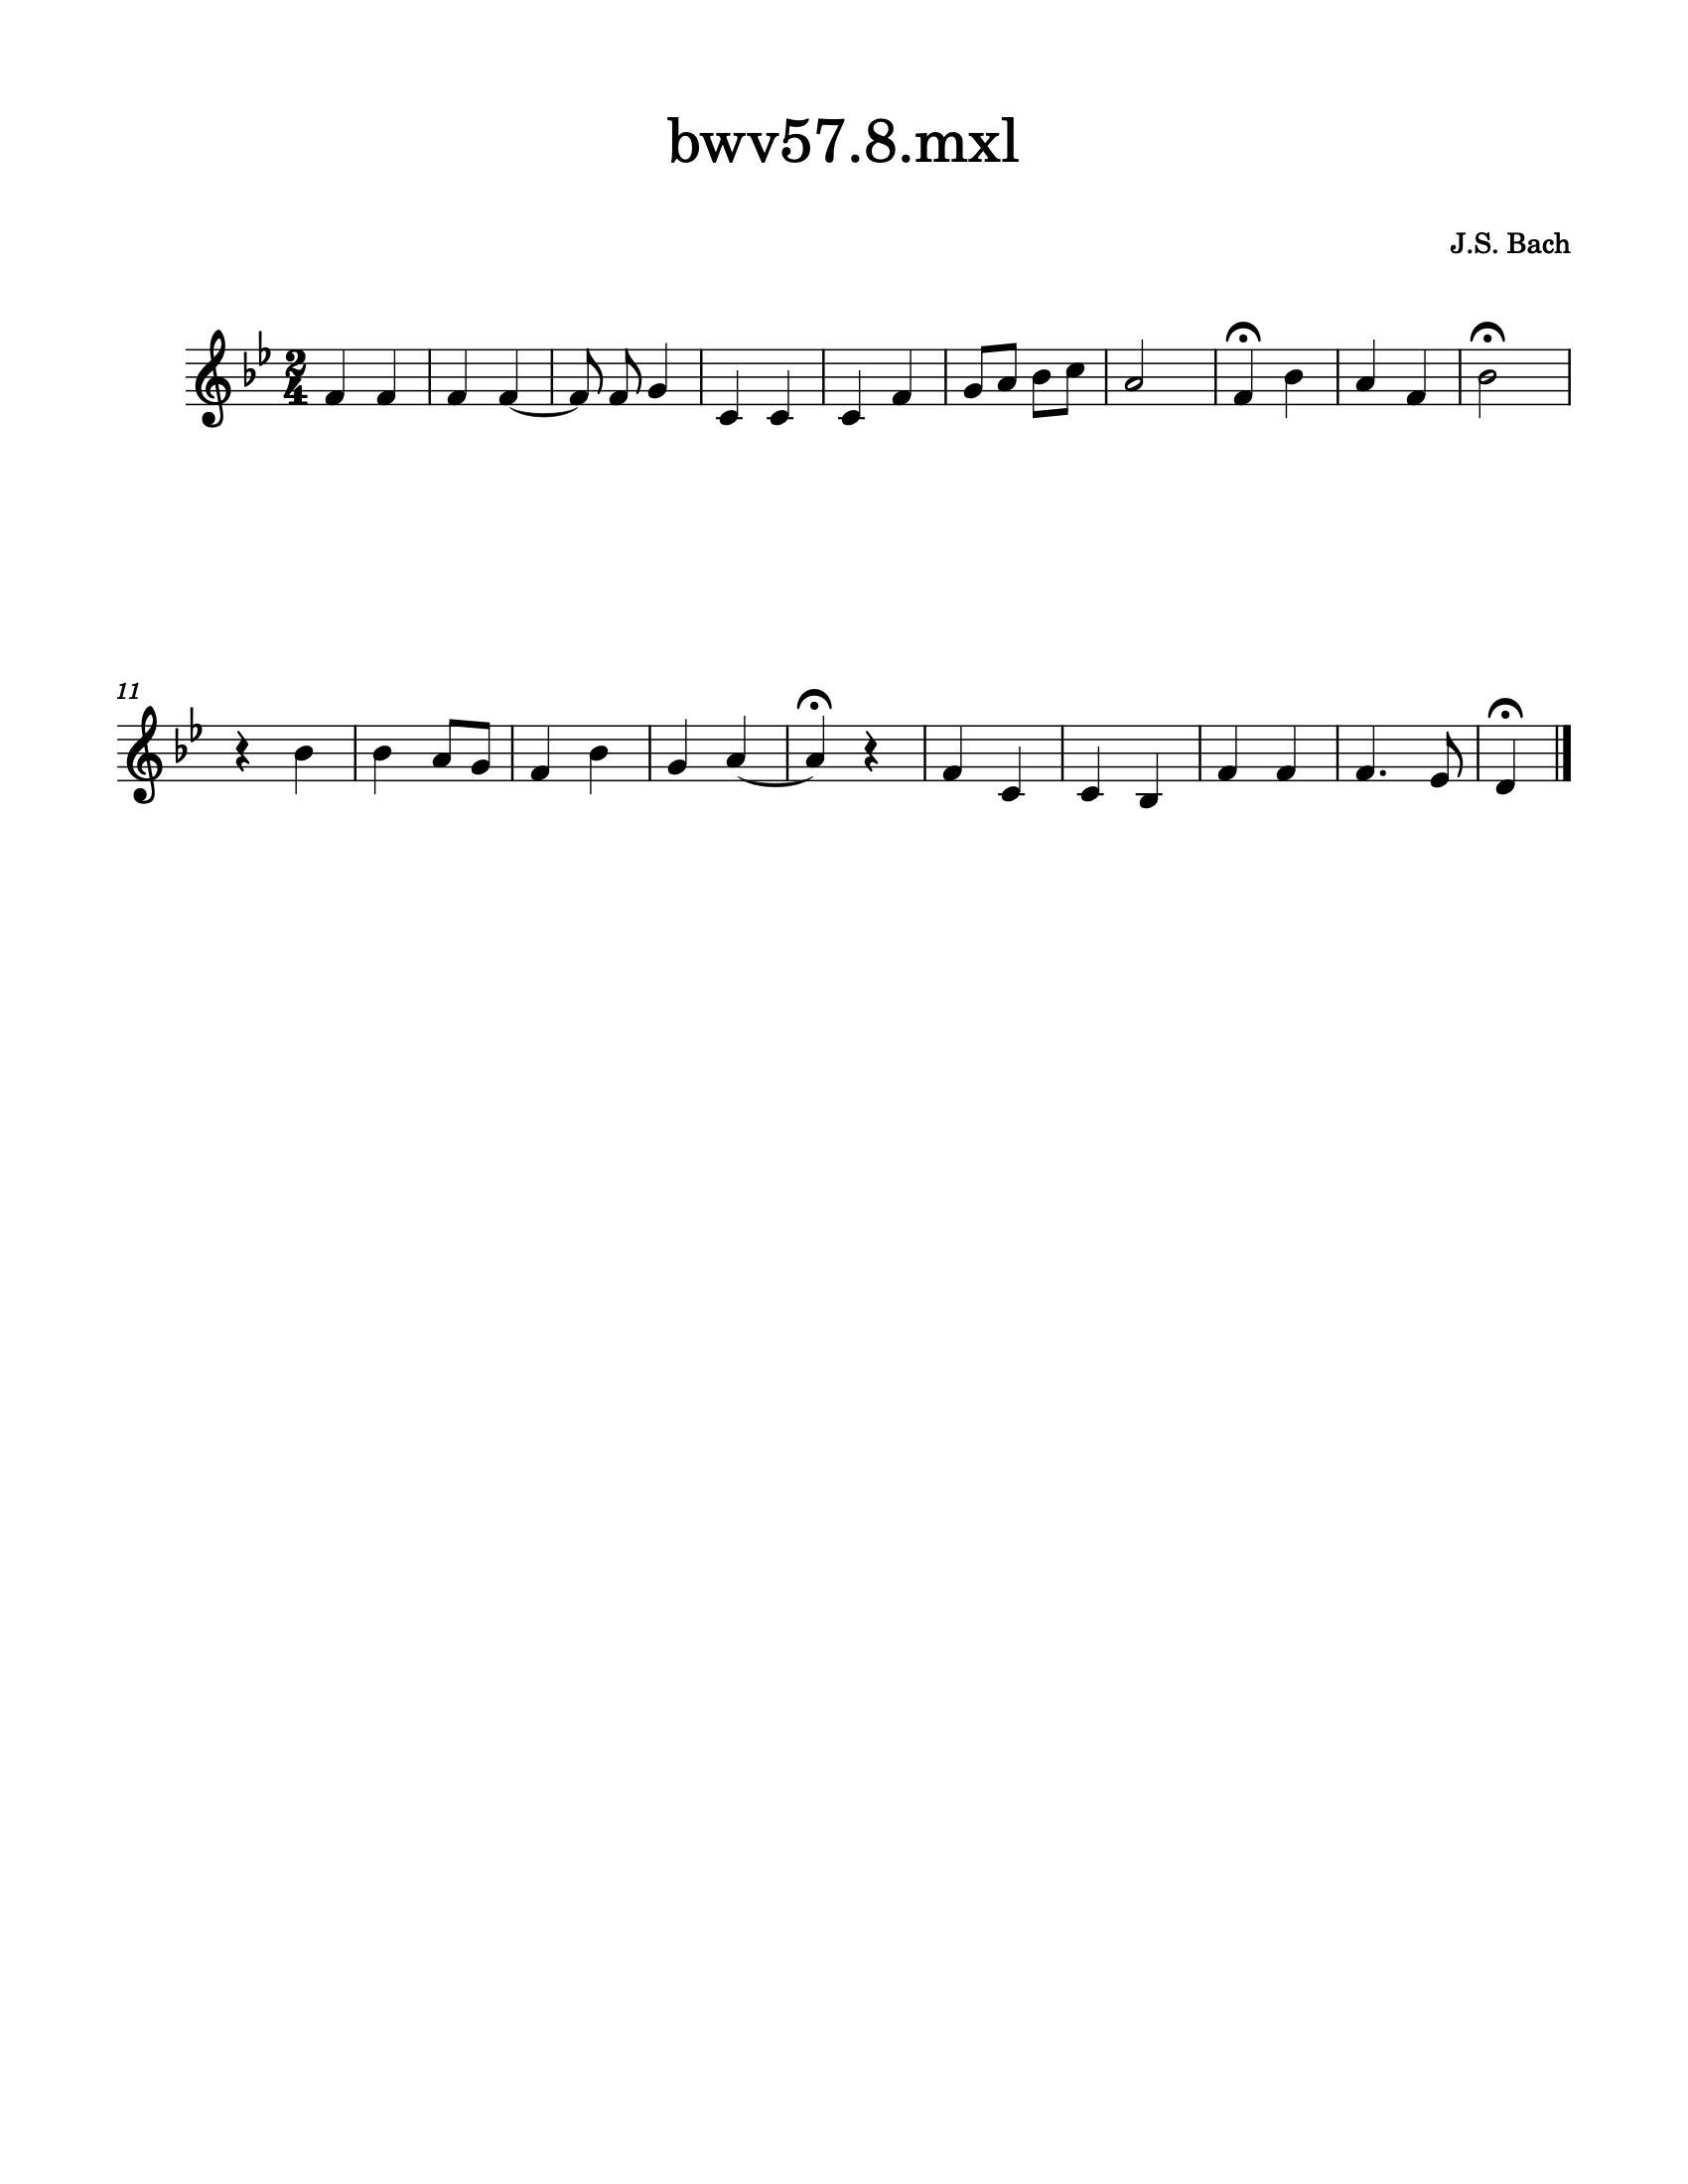

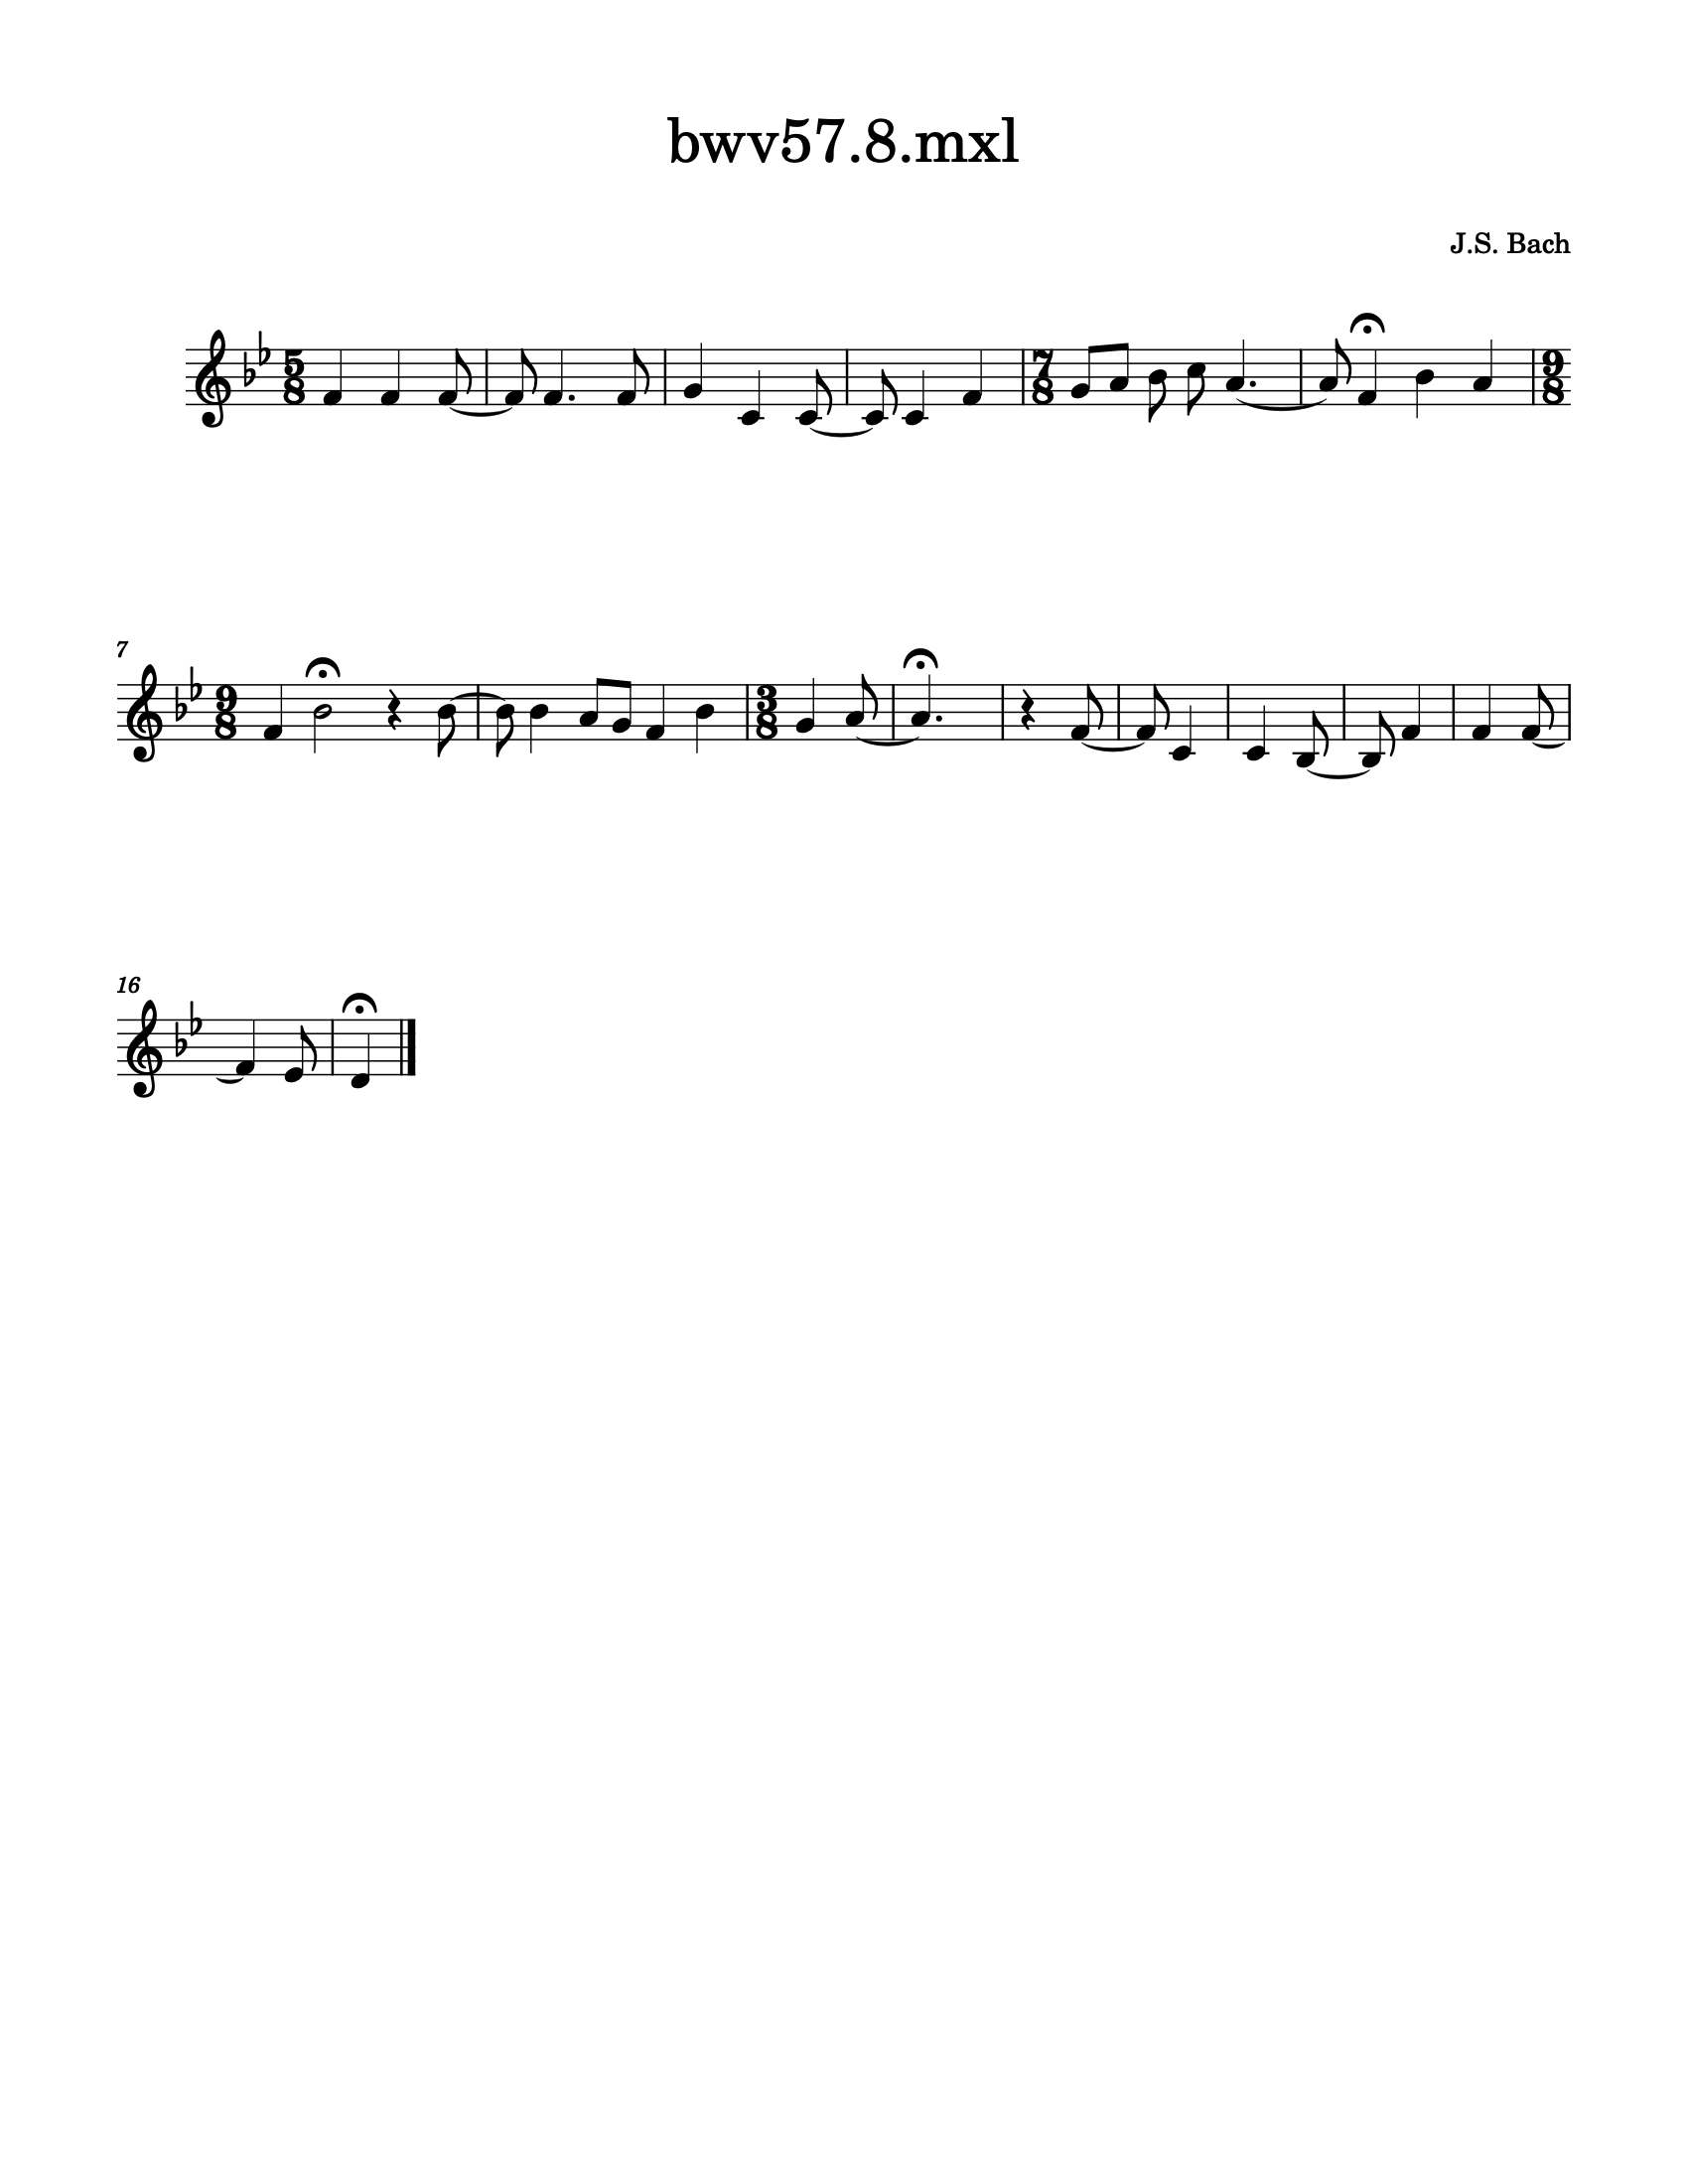

<class 'music21.stream.Part'>
{0.0} <music21.meter.TimeSignature 5/8>


In [36]:
newAlto = alto.flat.getElementsNotOfClass([meter.TimeSignature,
                                                layout.LayoutBase]
                                              ).stream()
newAlto.insert(0, meter.TimeSignature('2/4'))
newAlto.show()
newAlto.makeMeasures(inPlace=True)
newAlto.measures(1, 4).show('text', addEndTimes=True)
newAltoFixed = newAlto.makeNotation()
newAltoFixed.show()
newFlatAlto = newAlto.flat
ts = newFlatAlto.getTimeSignatures()[0]
newFlatAlto.replace(ts, meter.TimeSignature('5/8'))
newFlatAlto.getTimeSignatures()[0]
newFlatAlto.insert(10.0, meter.TimeSignature('7/8'))
newFlatAlto.insert(17.0, meter.TimeSignature('9/8'))
newFlatAlto.insert(26.0, meter.TimeSignature('3/8'))
newFlatAlto.makeNotation().show()
tsList = newAlto.getTimeSignatures()
print(tsList.__class__)
tsList.show('text')



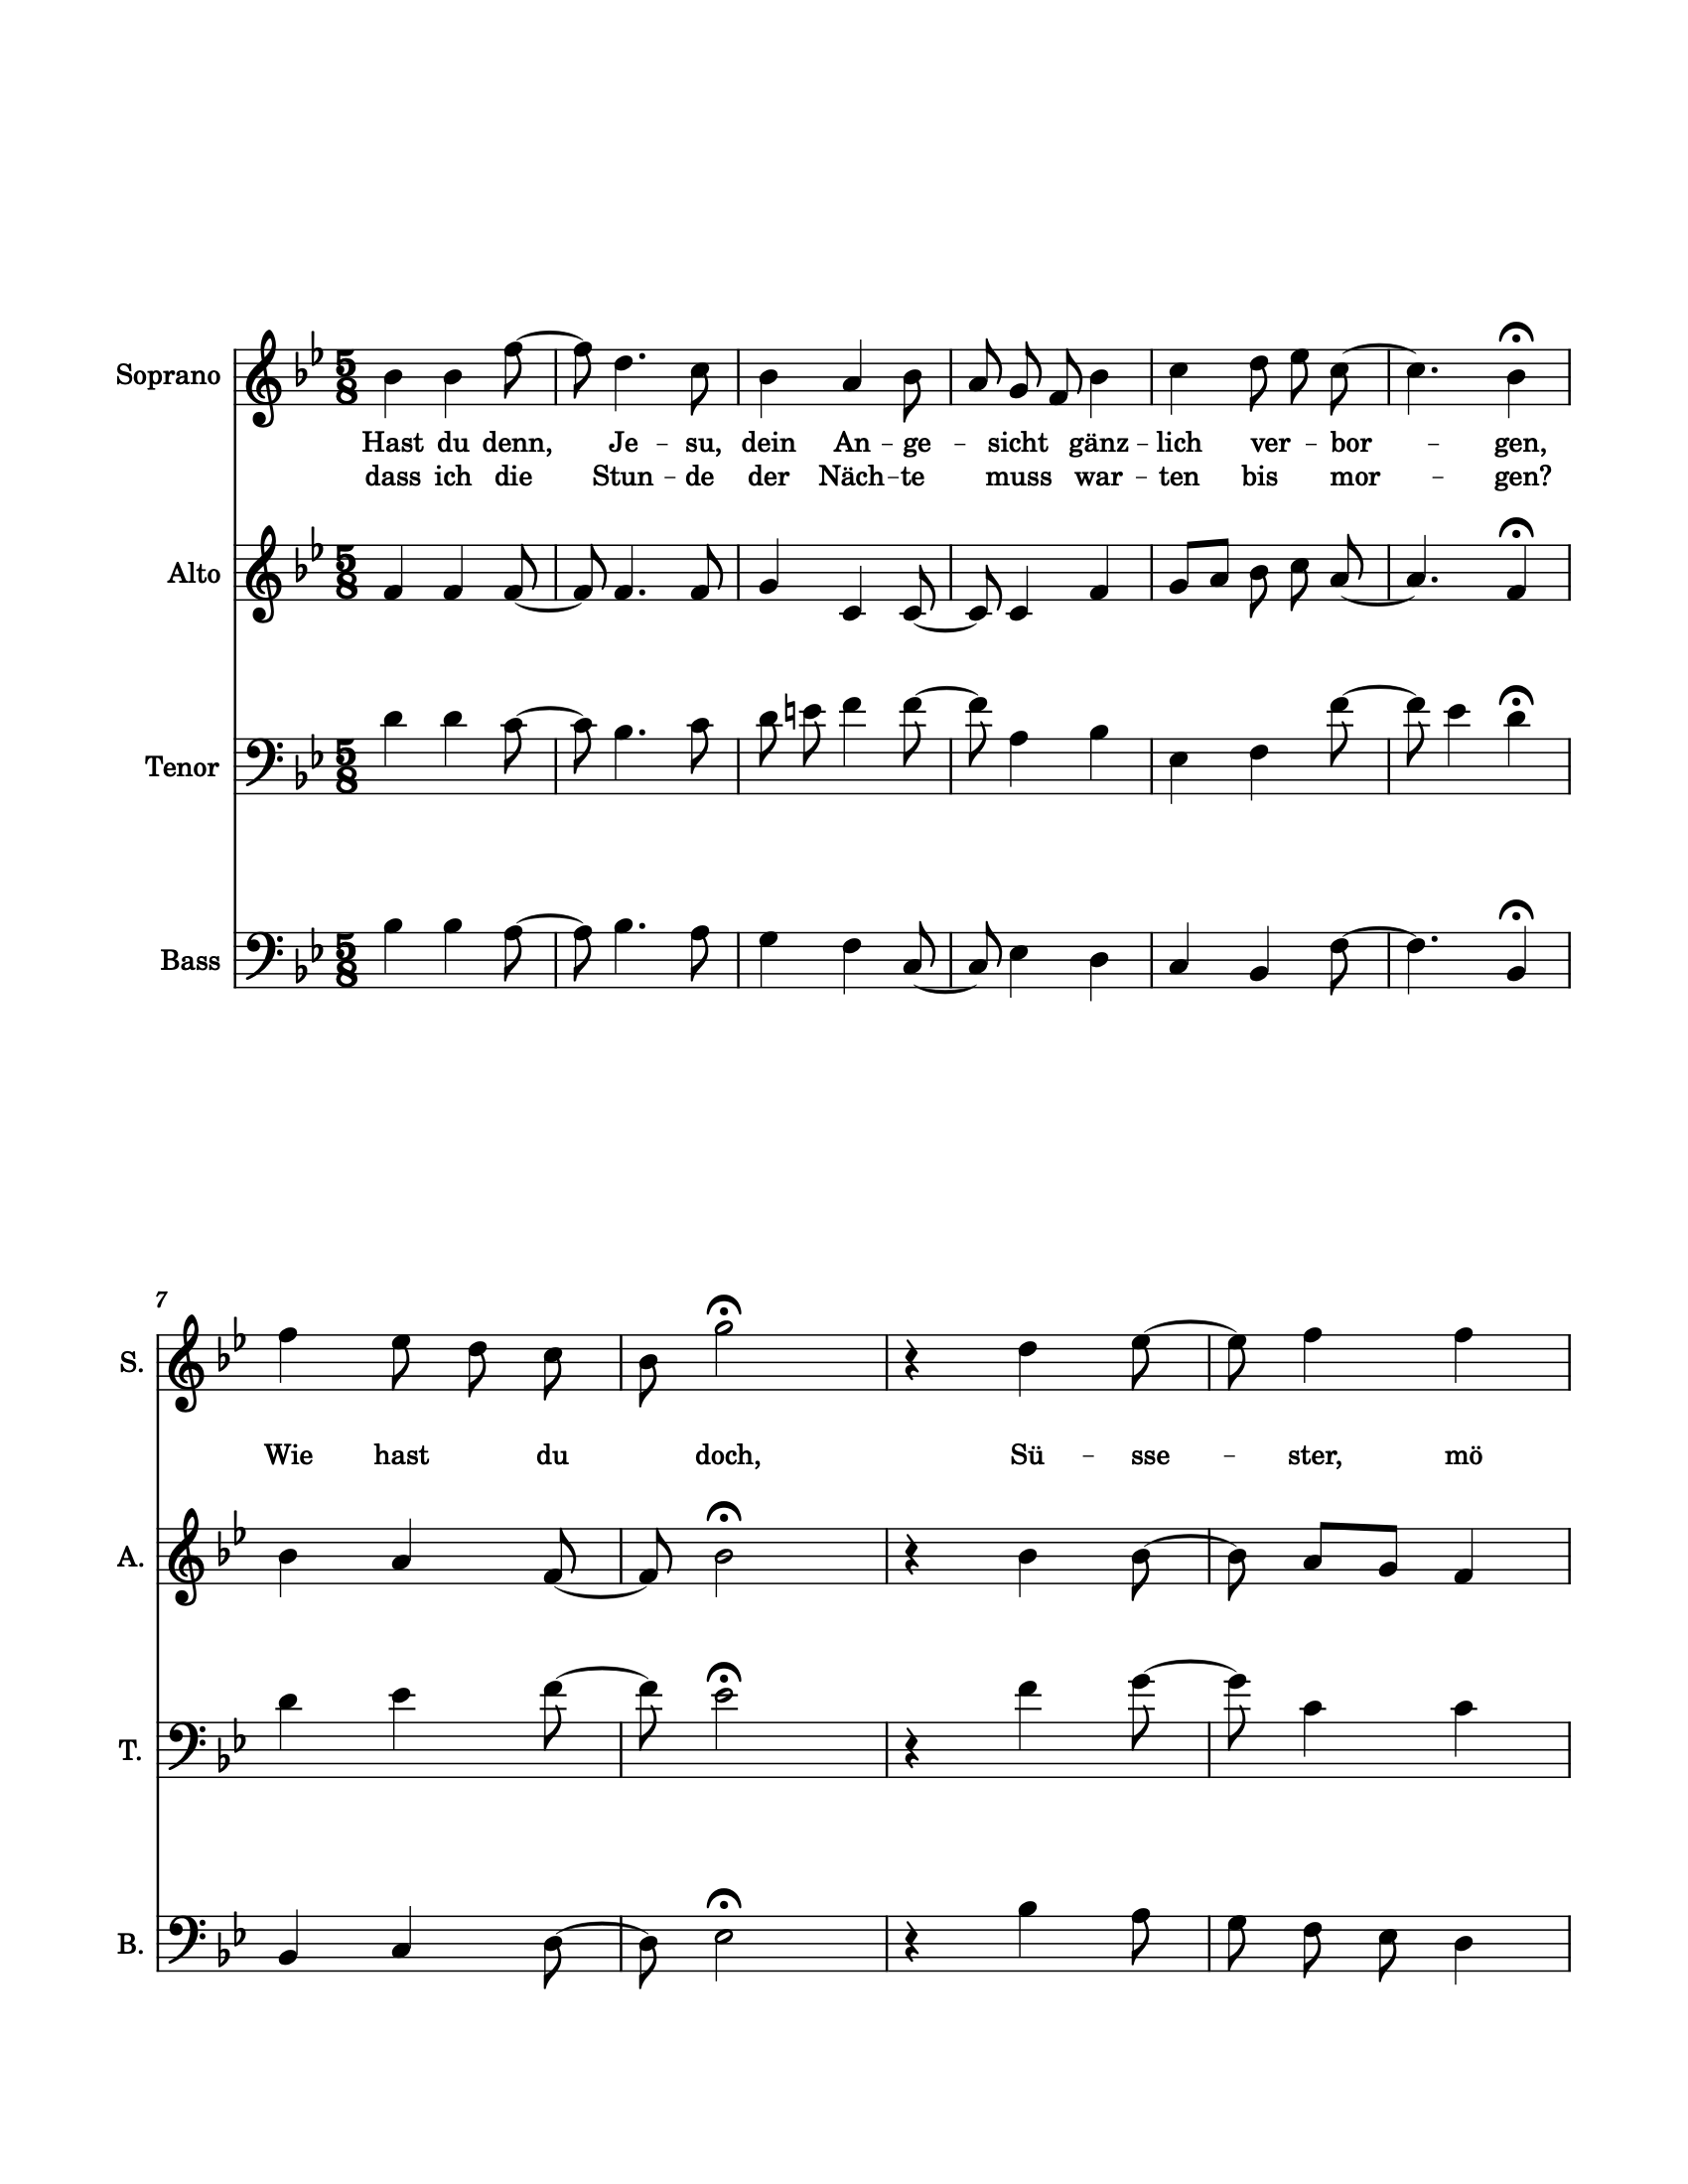

In [37]:
newScore = stream.Score()

for part in myBach.parts:
    flatPart = part.flat
    noTSPart = flatPart.getElementsNotOfClass('TimeSignature').stream()
    for ts in tsList:
        noTSPart.insert(ts.offset, ts)
    noTSPart.makeNotation(inPlace=True)
    newScore.insert(0, noTSPart)

newScore.measures(1, 10).show()

<music21.note.Note B-> 1
<music21.note.Note B-> 2
<music21.note.Note F> 3
<music21.note.Note D> 1
<music21.note.Note C> 2 1/2
<music21.note.Note B-> 3


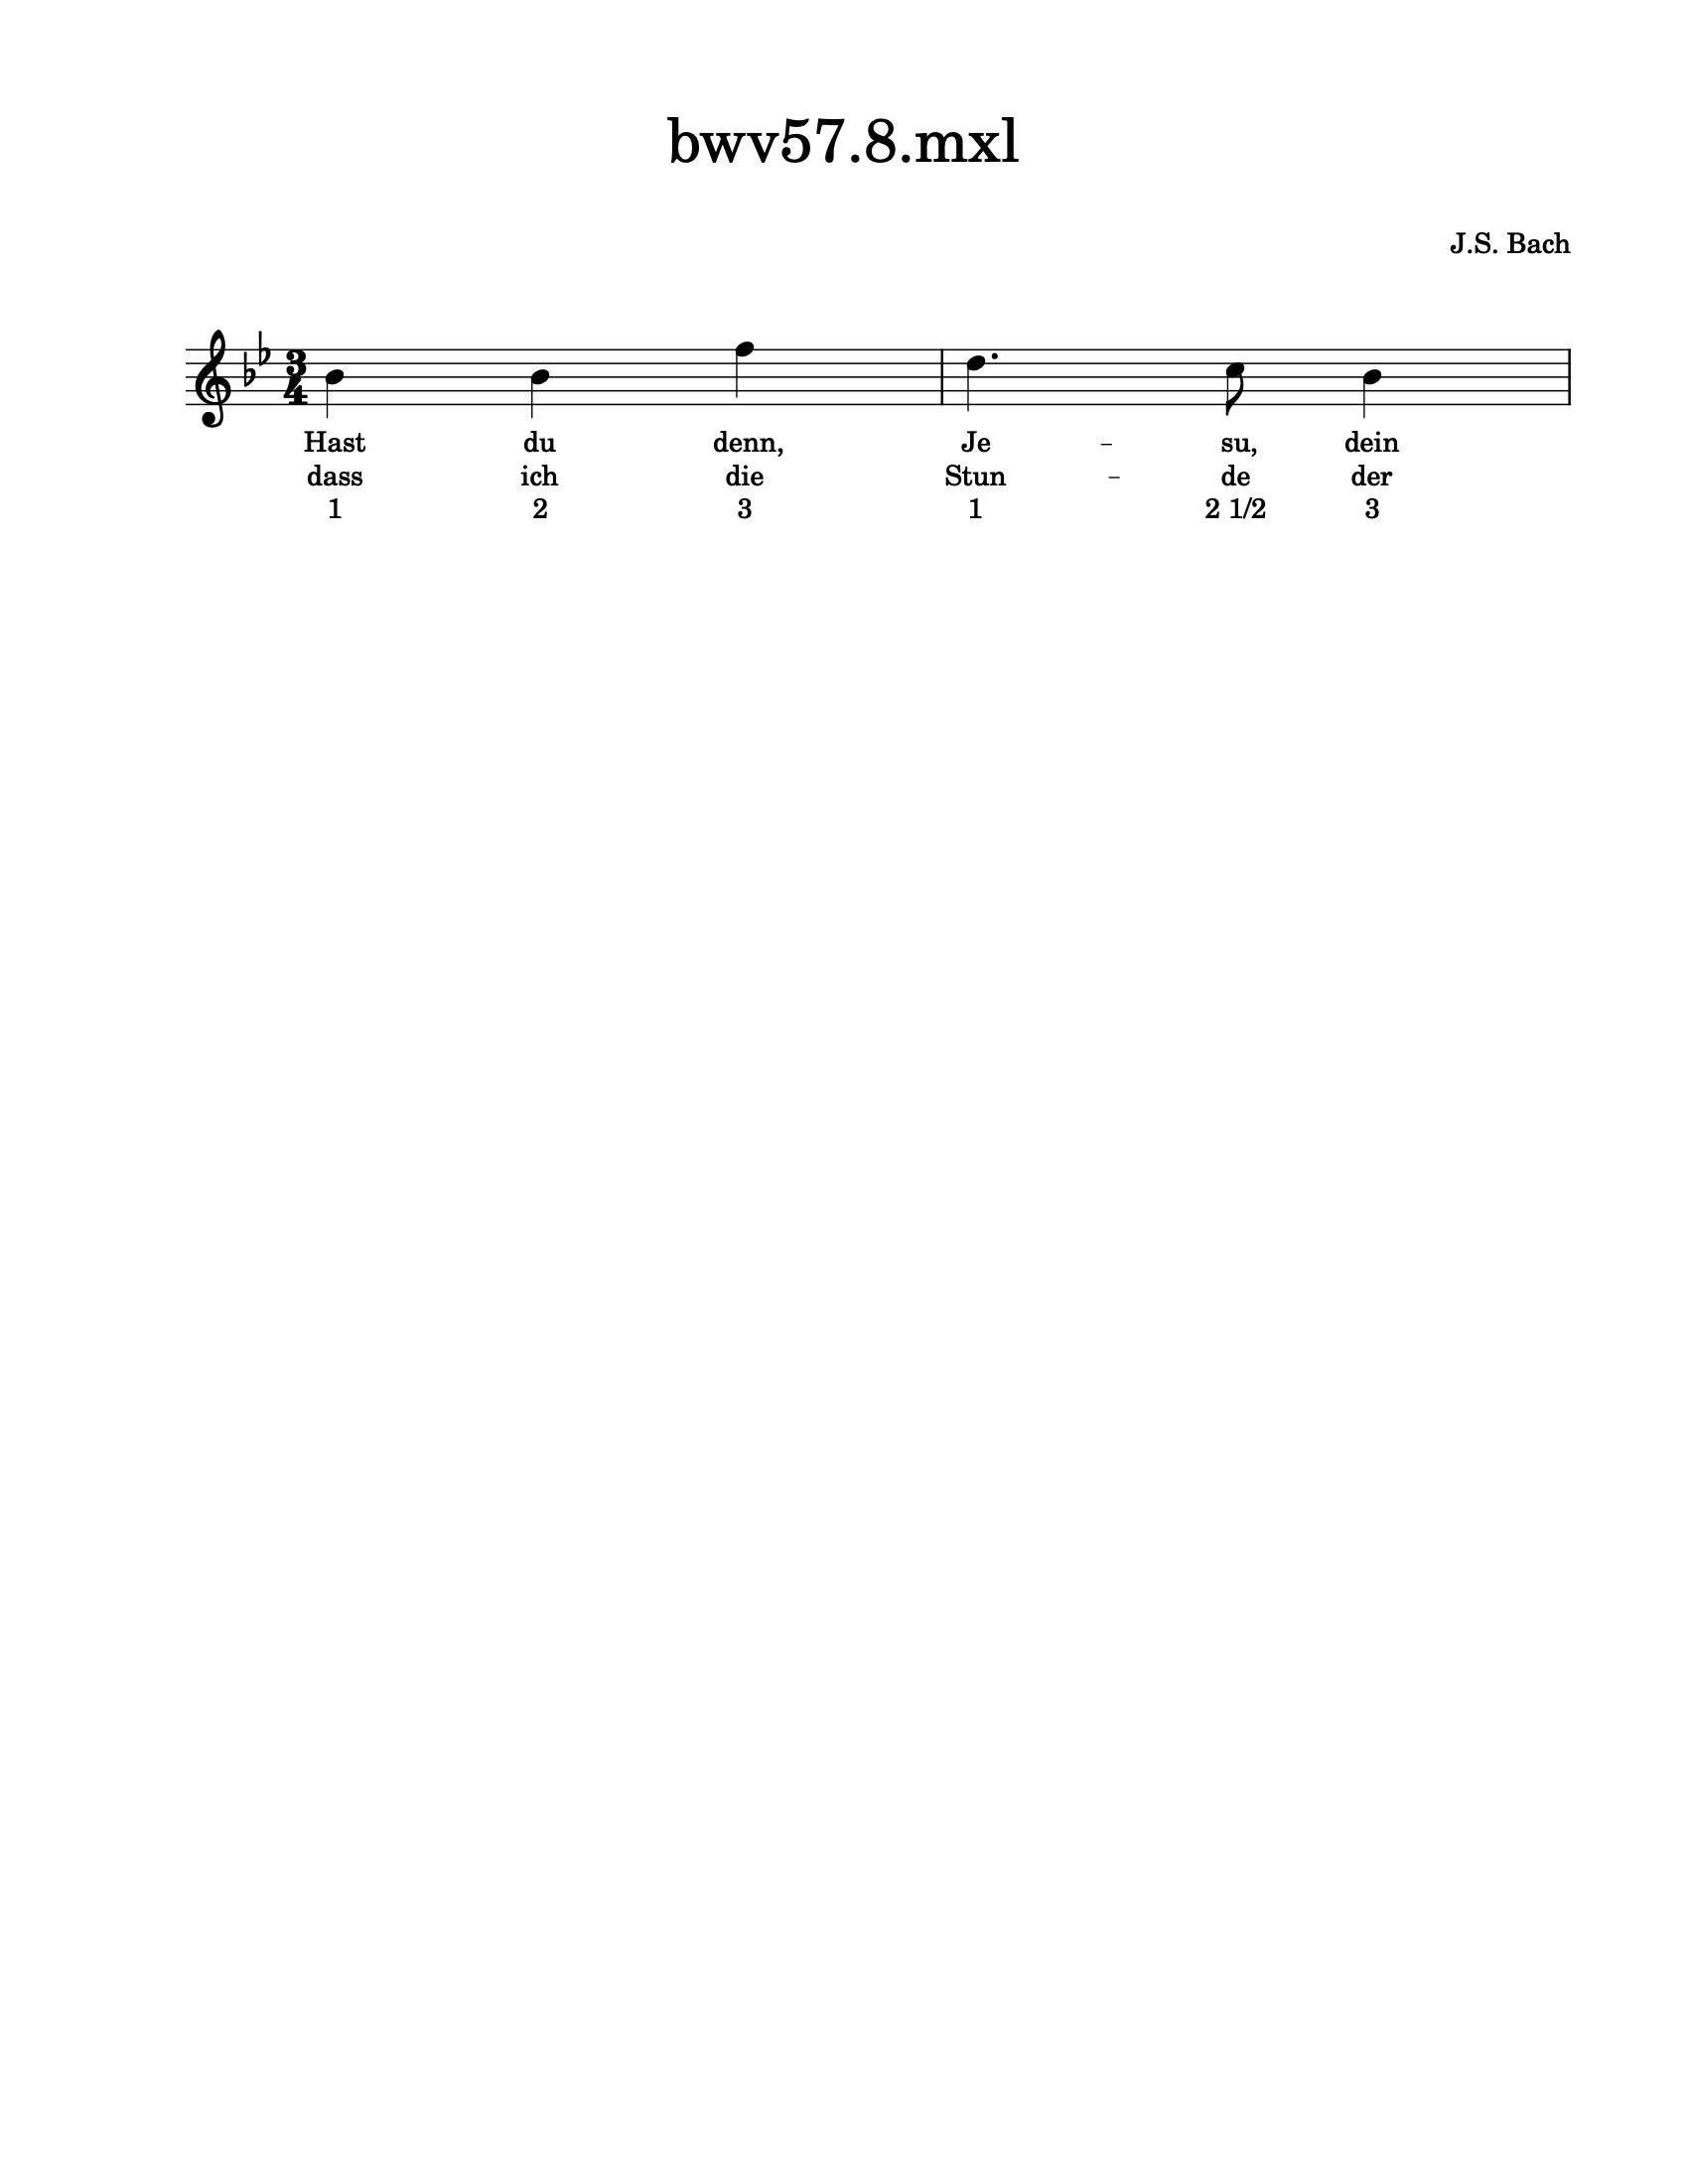

In [39]:
sopr = myBach.parts['Soprano'].measures(1,2)

for n in sopr.recurse().notes:
    print(n, n.beatStr)
for n in sopr.recurse().notes:
    n.addLyric(n.beatStr)

sopr.show()

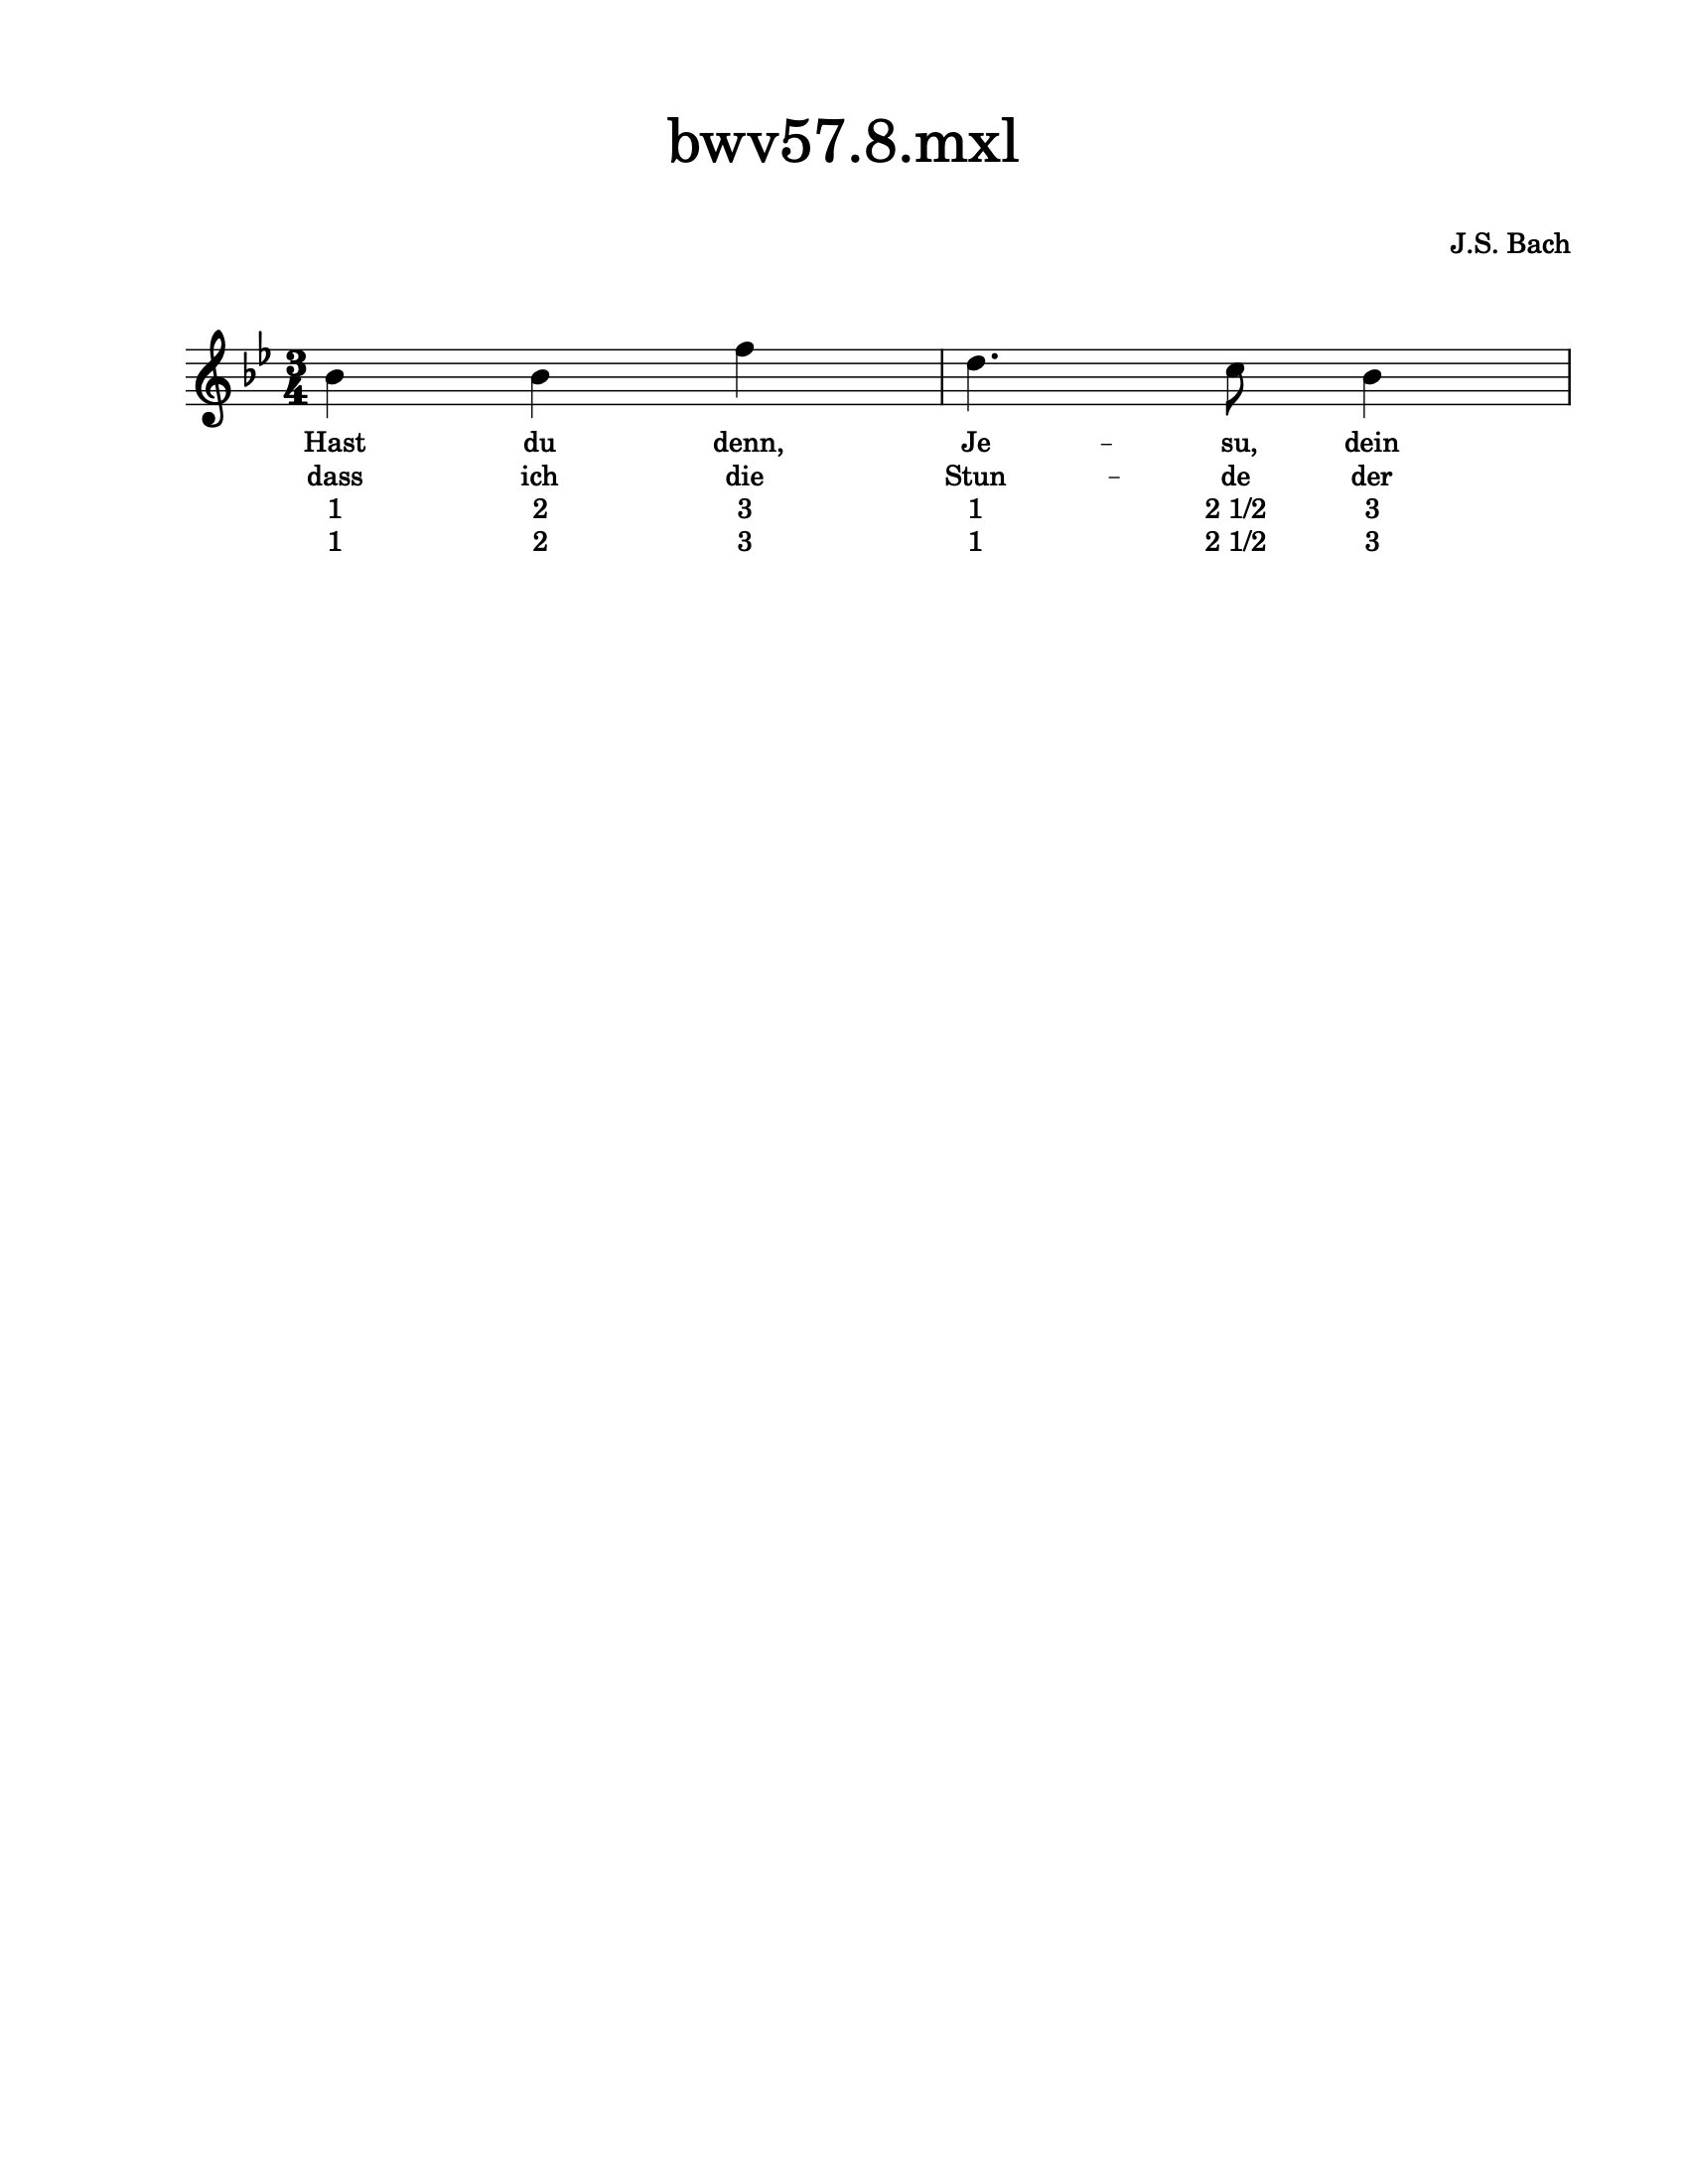

In [40]:
for n in sopr.recurse().notes:
    n.addLyric(n.beatStr)

sopr.show()

<music21.note.Note B-> 1.0
<music21.note.Note B-> 0.5
<music21.note.Note F> 0.5
<music21.note.Note D> 1.0
<music21.note.Note C> 0.25
<music21.note.Note B-> 0.5


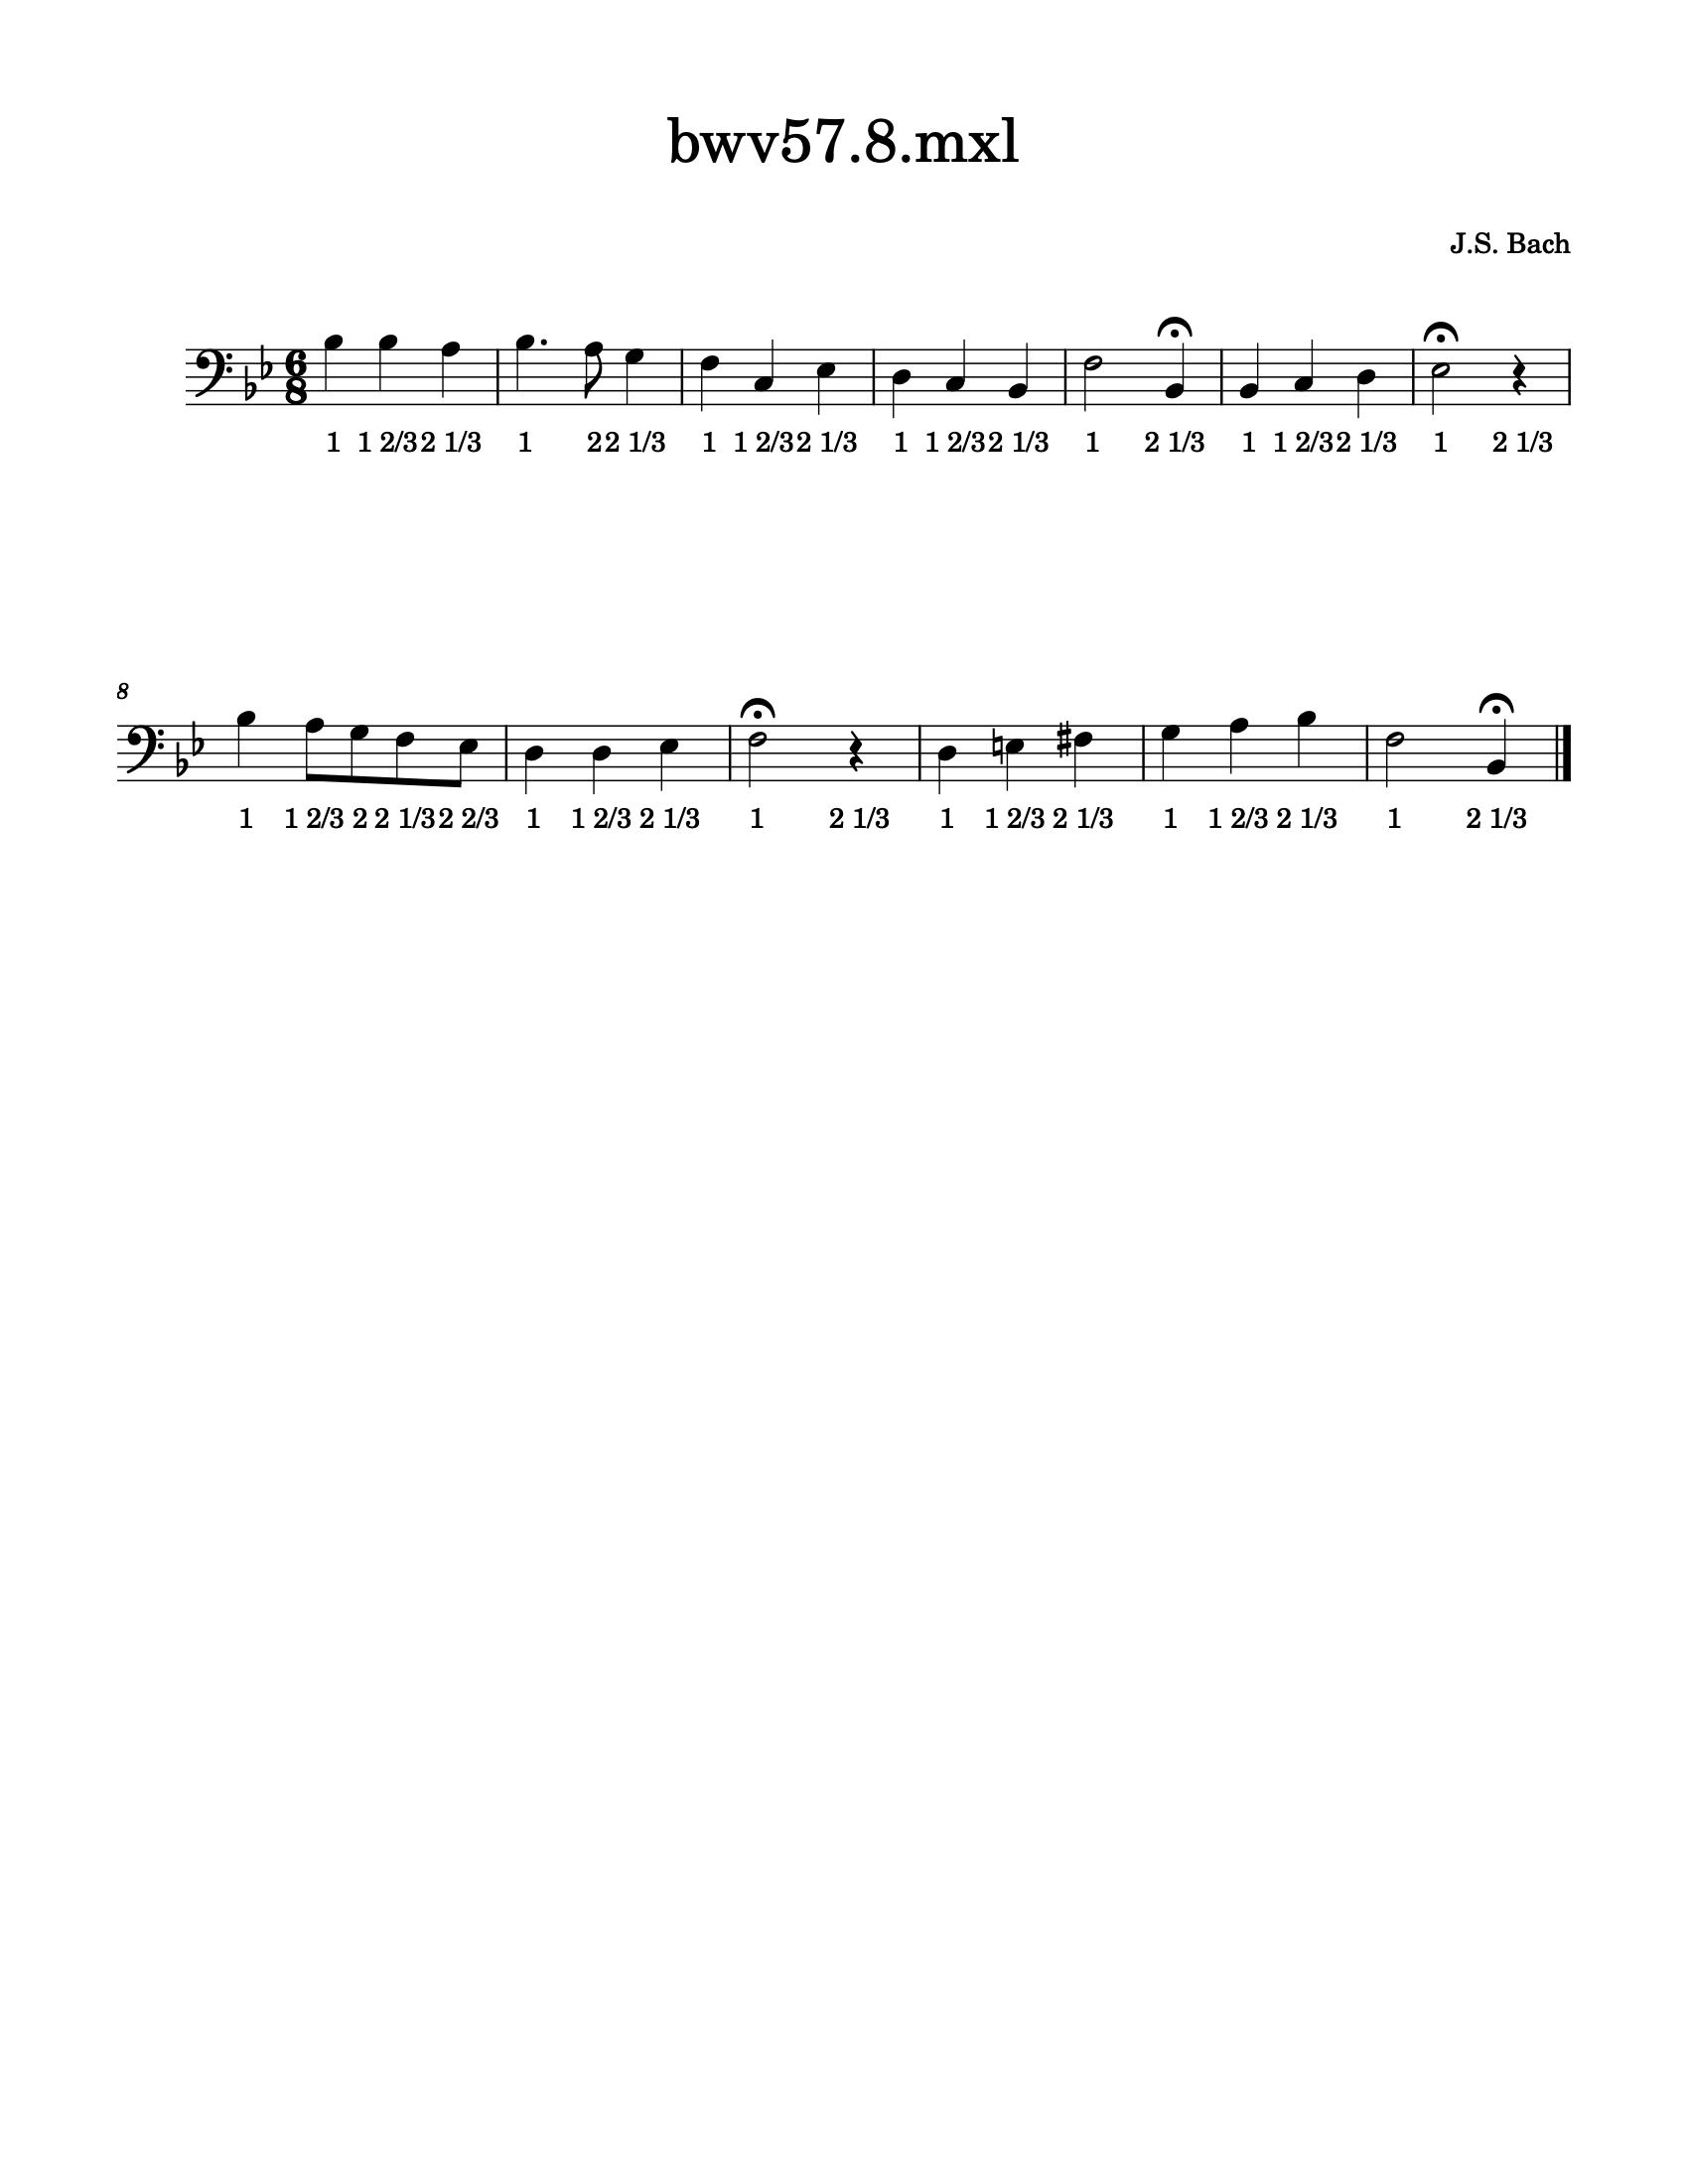

In [43]:
bass = myBach.getElementById('Bass')
newBass = bass.flat.getElementsNotOfClass(meter.TimeSignature).stream()
newMeasures = newBass.makeMeasures(meter.TimeSignature('6/8'))
newMeasures.makeTies(inPlace=True)
for n in newMeasures.recurse().notesAndRests:
    n.addLyric(n.beatStr)
for n in sopr.recurse().notes:
    print(n, n.beatStrength)
newMeasures.show()
